# CDS-1 PROJECT ASSIGNMENT - IABAC™
CDS_Project_2_INX_Future_Emp_Data_V1.6

Candidate Number IABAC870350803110616

# problem statement:
INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider
with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5
years. INX human resource policies are considered as employee friendly and widely perceived as best
practices in the industry.
Recent years, the employee performance indexes are not healthy and this is becoming a growing
concerns among the top management. There has been increased escalations on service delivery and
client satisfaction levels came down by 8 percentage points.
CEO, Mr. Brain, knows the issues but concerned to take any actions in penalizing non-performing
employees as this would affect the employee morale of all the employees in general and may further
reduce the performance. Also, the market perception best employer and thereby attracting best talents
to join the company.  
Mr. Brain decided to initiate a data science project , which analyses the current employee data and find
the core underlying causes of this performance issues. Mr. Brain, being a data scientist himself, expects
the findings of this project will help him to take right course of actions. He also expects a clear indicators
of non performing employees, so that any penalization  of non-performing employee, if required, may
not significantly affect other employee morals.
The following insights are expected from this project.
1. Department wise performances
2. Top 3 Important Factors effecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This
will be used to hire employees
4. Recommendations to improve the employee performance based on insights from analysis.

# 1- Import Libraries

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

display.max_columns=None

import warnings

warnings.filterwarnings('ignore')

# 2- Load DataSet

In [2]:
df=pd.read_excel(r'C:\Users\AK\Documents\AI Project Datamites\iabac cds project\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

df.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [3]:
df

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

In [4]:
list(df.columns)

['EmpNumber',
 'Age',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'OverTime',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition',
 'PerformanceRating']

In [5]:
pd.set_option("display.max_columns",None)
df

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0                   10                  3                           4   
1                   14                  4                           4   
2                    5                  4                           4   
3                   10                  4                           2   
4                   16                  4                           1   
...                ...                ...                         ...   
1195                 3                  1                           4   
1196                10                  2                           4   
1197                28                  1                           4   
1198                 9                  3                           4   
1199                 3                  2                           1   

      EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0                55                  3            2                   4   
1                42                  3            2                   1   
2                48                  2            3                   1   
3                73                  2            5                   4   
4                84                  3            2                   1   
...             ...                ...          ...                 ...   
1195             71                  4            2                   4   
1196             80                  4            1                   4   
1197             74                  4            1                   3   
1198             46                  2            3                   2   
1199             65                  3            2                   3   

      NumCompaniesWorked OverTime  EmpLastSalaryHikePercent  \
0                      1       No                        12   
1                      2       No                        12   
2                      5      Yes                        21   
3                      3       No                        15   
4                      8       No                        14   
...                  ...      ...                       ...   
1195                   1      Yes                        20   
1196                   3       No                        17   
1197                   1      Yes                        11   
1198       

In [6]:
df["PerformanceRating"].isnull().sum()

0

# 3-Domain analysis

The data for training the model was collected from the company INX Future Inc. The data collected included 1200 employee’s performance appraisal records, described by 28 parameters. the parameters show the different attributes of an employee based on which the prediction is to be made.

1. EmpNumber: Employee ID

2. Age: Employee's age

3. Gender: Employee's gender

4. EducationBackground: Educational background

5. MaritalStatus: Marital status

6. EmpDepartment: Department within the company

7. EmpJobRole: Job role in the company

8. BusinessTravelFrequency: Frequency of business travel

9. DistanceFromHome: Distance from home to work

10. EmpEducationLevel: Education level of the employee

11. EmpRelationshipSatisfaction: Satisfaction with relationships at work
12. EmpHourlyRate:
The hourly wage paid to the employee

13. EmpJobInvolvement:
A rating of how involved the employee is with their job.
14. EmpJobLevel:
 The seniority level or hierarchy of the employees role in the company.
15. EmpJobSatisfaction:
Employee’s satisfaction with their current job role.
16. NumCompaniesWorked:
Number of companies the employee has worked at before joining the current one.
17. OverTime:
Whether the employee works overtime frequently.
18. EmpLastSalaryHikePercent
The percentage increase in salary during the last appraisal cycle.
19. EmpRelationshipSatisfaction
Satisfaction with workplace relationships (colleagues, manager, team).
20. TotalWorkExperienceInYears: Total years of work experience

21. TrainingTimesLastYear: Number of training sessions attended in the last year

22. EmpWorkLifeBalance: Work-life balance rating

23. ExperienceYearsAtThisCompany: Years of experience at this company

24. ExperienceYearsInCurrentRole: Years of experience in the current role

25. YearsSinceLastPromotion: Years since the last promotion

26. YearsWithCurrManager: Years working with the current manager

27. Attrition: Indicates if the employee has left the company (Yes/No)

28. PerformanceRating: Performance rating of the employee

This data is rich in features useful for analyzing employee performance, attrition, and factors contributing to job satisfaction and retention. It can be used for a variety of analyses, including identifying key drivers of performance, attrition prediction, and even constructing a predictive model for employee performance.

### Personal & Demographic Information
| Attribute               | Description                                                                                                              |
| ----------------------- | ------------------------------------------------------------------------------------------------------------------------ |
| **EmpNumber**           | Unique employee identifier. Used for record tracking.                                                                    |
| **Age**                 | Current age of the employee (in years).                                                                                  |
| **Gender**              | Gender of the employee (e.g., Male/Female).                                                                              |
| **MaritalStatus**       | Marital status (Single, Married, Divorced).                                                                              |
| **EducationBackground** | Field of education (e.g., Life Sciences, Marketing).                                                                     |
| **EmpEducationLevel**   | Education level on a scale (commonly 1 to 5). Higher number = higher education (e.g., 1 = Below College, 5 = Doctorate). |


### Job Information
| Attribute                   | Description                                                                          |
| --------------------------- | ------------------------------------------------------------------------------------ |
| **EmpDepartment**           | Department the employee works in (e.g., Sales, Development).                         |
| **EmpJobRole**              | Specific role within the department (e.g., Developer, Sales Executive).              |
| **EmpJobLevel**             | Job seniority or grade level. Higher = more senior.                                  |
| **BusinessTravelFrequency** | Frequency of business travel (e.g., Travel\_Rarely, Travel\_Frequently, Non-Travel). |
| **DistanceFromHome**        | Distance from home to office in kilometers/miles.                                    |
| **OverTime**                | Indicates if employee works overtime (Yes/No).                                       |


### Experience & Tenure

| Attribute                      | Description                                                                      |
| ------------------------------ | -------------------------------------------------------------------------------- |
| **TotalWorkExperienceInYears** | Total years of professional work experience.                                     |
| **NumCompaniesWorked**         | Total companies the employee has worked for. Indicates job hopping or stability. |


### Compensation & Performance
| Attribute                    | Description                                                                                                                            |
| ---------------------------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **EmpHourlyRate**            | Hourly wage of the employee.                                                                                                           |
| **EmpLastSalaryHikePercent** | Percent increase in the most recent salary hike.                                                                                       |
| **PerformanceRating**        | Employee performance score (often from manager review). *This column is mentioned in your intro but not shown in the dataset preview.* |


### Job Satisfaction & Engagement
| Attribute                       | Description                                                                                              |
| ------------------------------- | -------------------------------------------------------------------------------------------------------- |
| **EmpJobInvolvement**           | Degree of involvement or commitment to the job (scale, e.g., 1 = low, 4 = high).                         |
| **EmpJobSatisfaction**          | Job satisfaction level (scale, e.g., 1 = low, 4 = high).                                                 |
| **EmpEnvironmentSatisfaction**  | Satisfaction with workplace environment (1 to 4).                                                        |
| **EmpRelationshipSatisfaction** | Satisfaction with interpersonal relationships at work (1 to 4).                                          |
| **EmpWorkLifeBalance**          | Balance between work and personal life (not shown in your dataset, but part of original attribute list). |


### Tenure in Company/Role
| Attribute                        | Description                                                                                                              |
| -------------------------------- | ------------------------------------------------------------------------------------------------------------------------ |
| **ExperienceYearsAtThisCompany** | Years the employee has been with the current company. *(Not shown in the preview, but mentioned in your attribute list)* |
| **ExperienceYearsInCurrentRole** | Years the employee has spent in the current job role. *(Also not shown in preview)*                                      |
| **YearsSinceLastPromotion**      | Number of years since last promotion. *(Also not shown)*                                                                 |
| **YearsWithCurrManager**         | Years spent working with current manager. *(Also not shown)*                                                             |


### Attrition
| Attribute     | Description                                                                                                                                                         |
| ------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Attrition** | Indicates whether the employee has left the company (Yes/No). Important for attrition prediction models. *(Not shown in the preview but part of your description.)* |


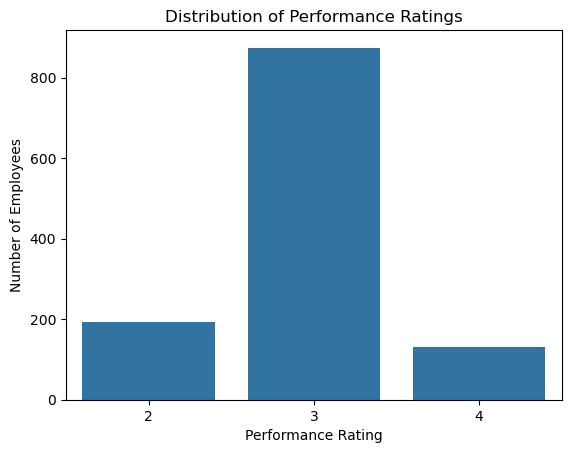

In [7]:
sns.countplot(x='PerformanceRating', data=df)

plt.title('Distribution of Performance Ratings')

plt.xlabel('Performance Rating')

plt.ylabel('Number of Employees')

plt.show()

# 4-Basic checks

In [8]:
df.shape

(1200, 28)

In [9]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [10]:
df.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [11]:
df.describe(include='object')

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [13]:
df.duplicated().sum()

0

# 4-Data Visualization

### Distributions

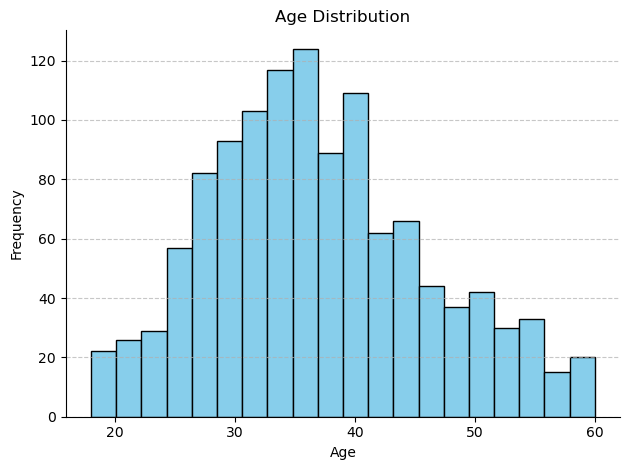

In [14]:


# Plotting histogram for 'Age' column
df['Age'].plot(kind='hist', bins=20, title='Age Distribution', color='skyblue', edgecolor='black')

# Remove top and right borders for cleaner look
plt.gca().spines[['top', 'right']].set_visible(False)

# Add labels
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


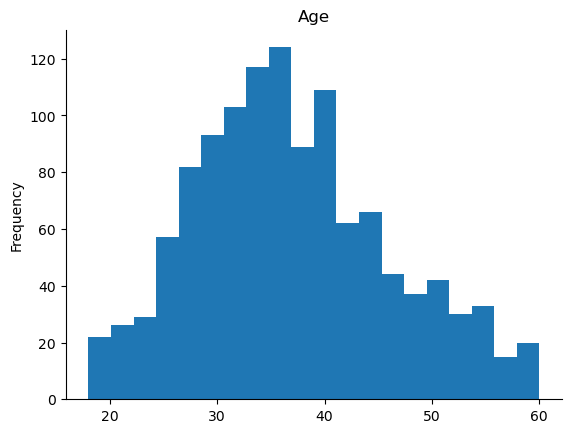

In [15]:
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

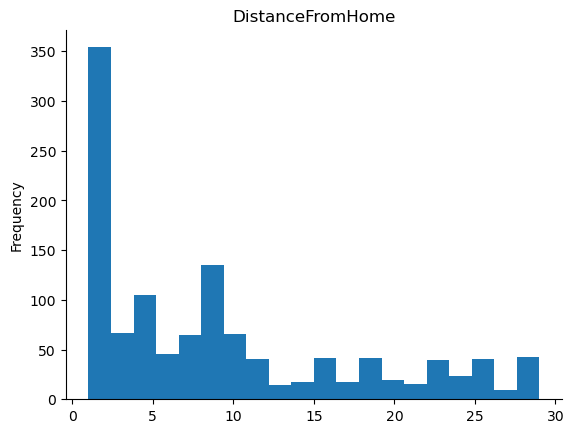

In [16]:

df['DistanceFromHome'].plot(kind='hist', bins=20, title='DistanceFromHome')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

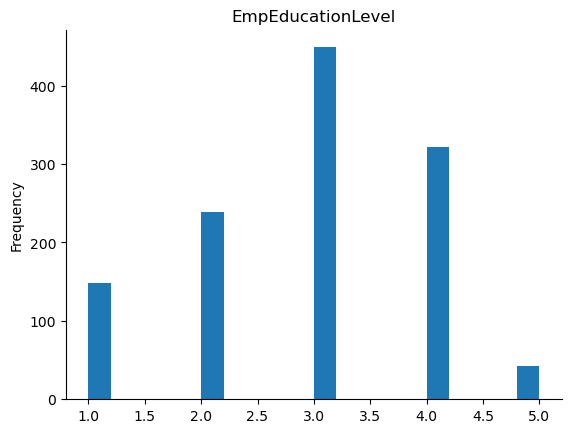

In [17]:
df['EmpEducationLevel'].plot(kind='hist', bins=20, title='EmpEducationLevel')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

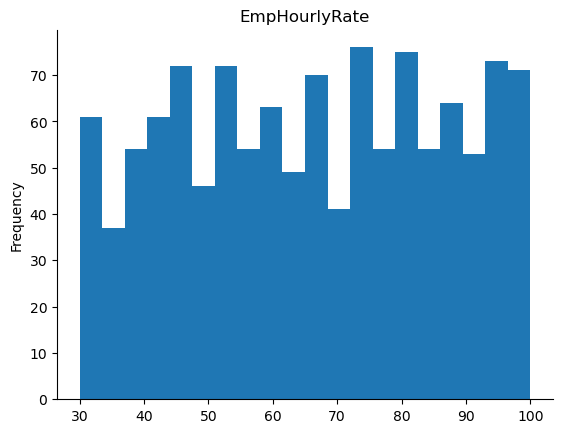

In [18]:
df['EmpHourlyRate'].plot(kind='hist', bins=20, title='EmpHourlyRate')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

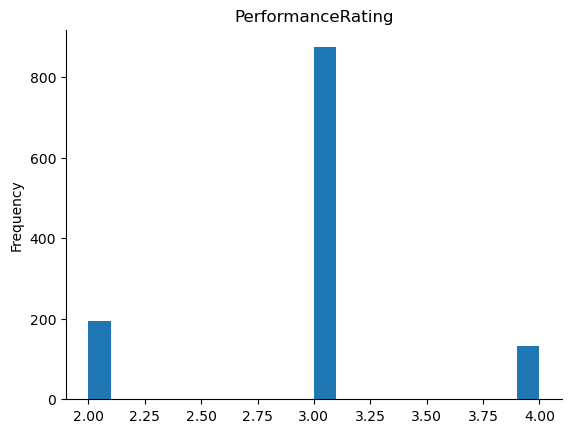

In [19]:
df['PerformanceRating'].plot(kind='hist', bins=20, title='PerformanceRating')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

### Categorical distributions

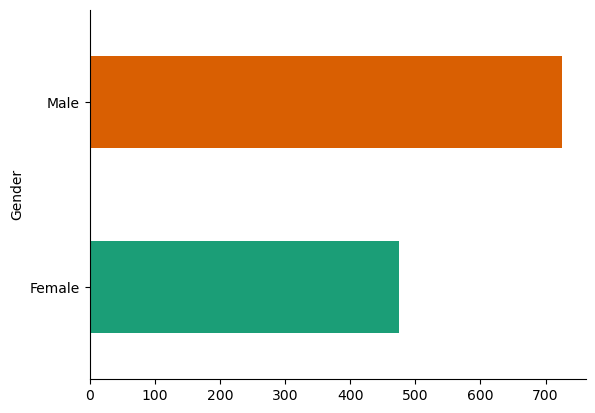

In [20]:

df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

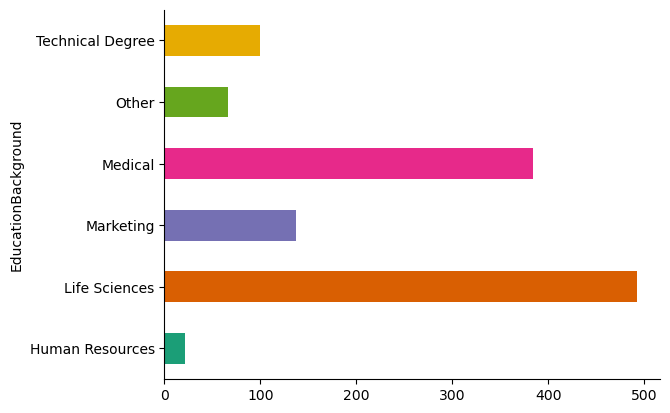

In [21]:

df.groupby('EducationBackground').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

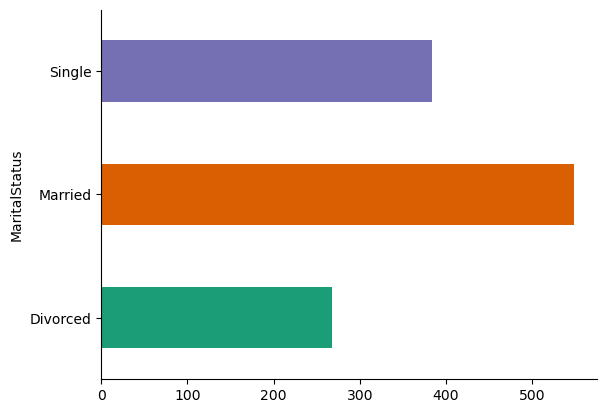

In [22]:

df.groupby('MaritalStatus').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

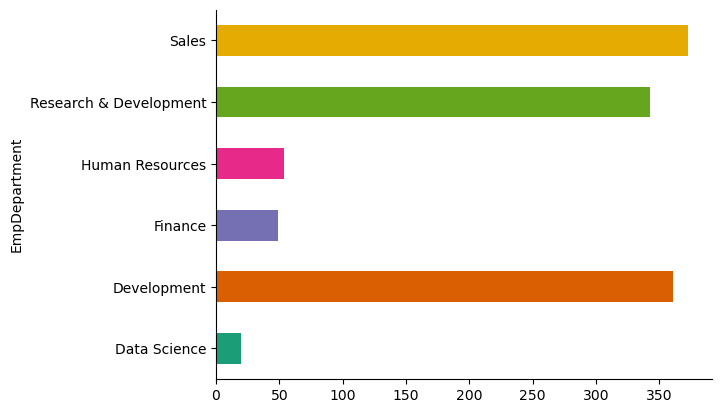

In [23]:

df.groupby('EmpDepartment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

### 2-d distributions

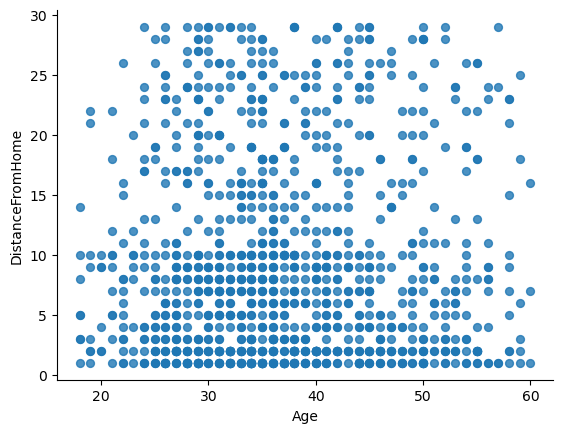

In [24]:

df.plot(kind='scatter', x='Age', y='DistanceFromHome', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

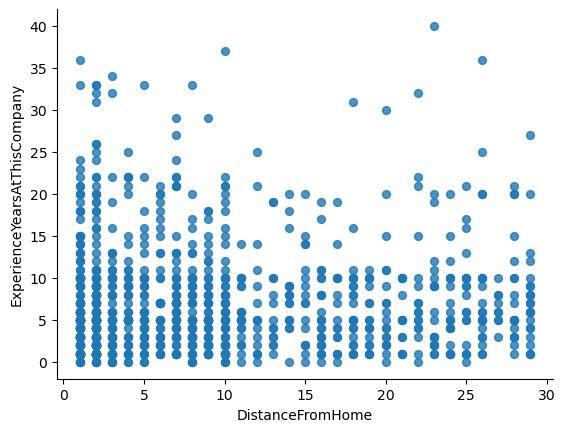

In [25]:

df.plot(kind='scatter', x='DistanceFromHome', y='ExperienceYearsAtThisCompany', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

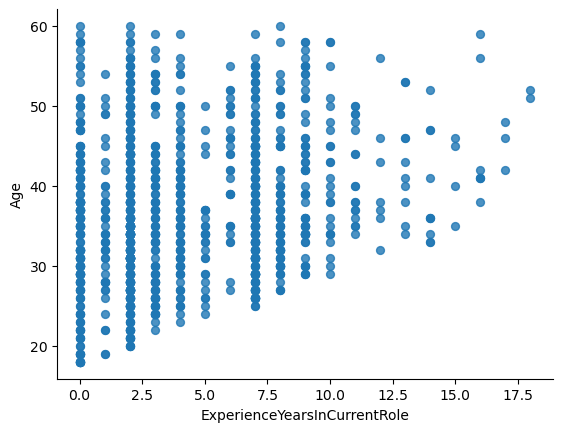

In [26]:

df.plot(kind='scatter', x='ExperienceYearsInCurrentRole', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

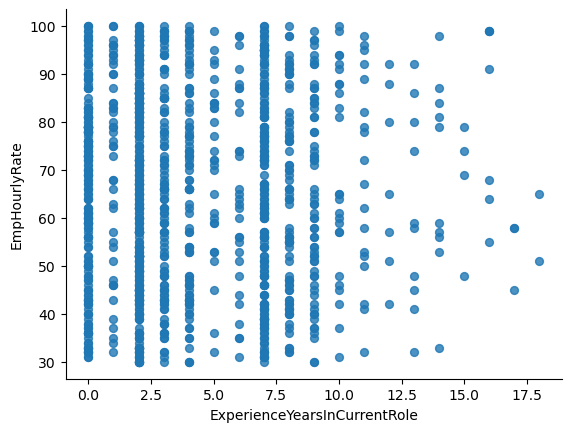

In [27]:

df.plot(kind='scatter', x='ExperienceYearsInCurrentRole', y='EmpHourlyRate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

### Values

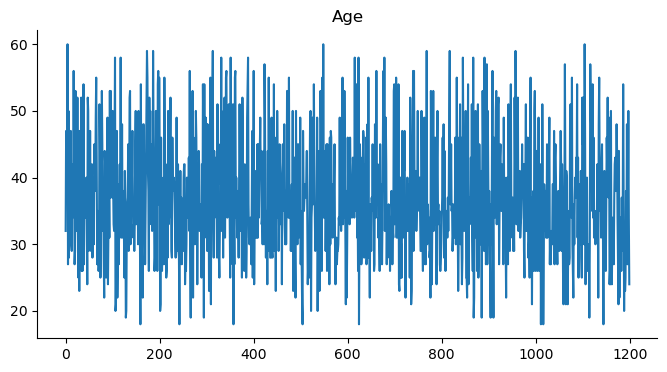

In [28]:

df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

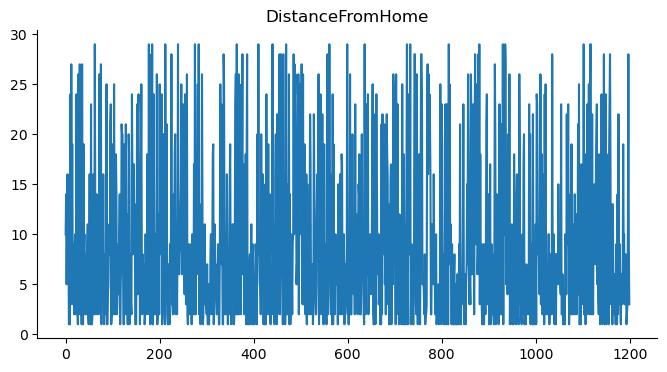

In [29]:

df['DistanceFromHome'].plot(kind='line', figsize=(8, 4), title='DistanceFromHome')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

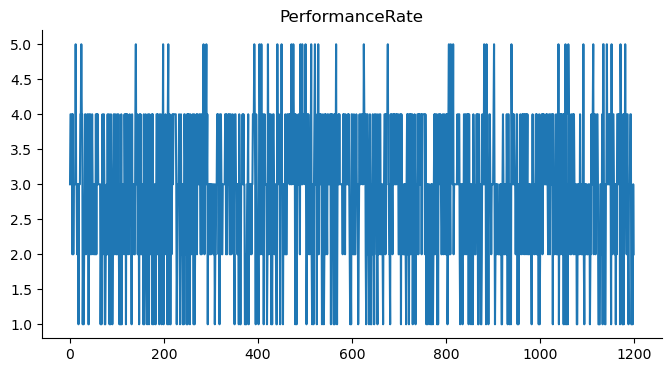

In [30]:

df['EmpEducationLevel'].plot(kind='line', figsize=(8, 4), title='PerformanceRate')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

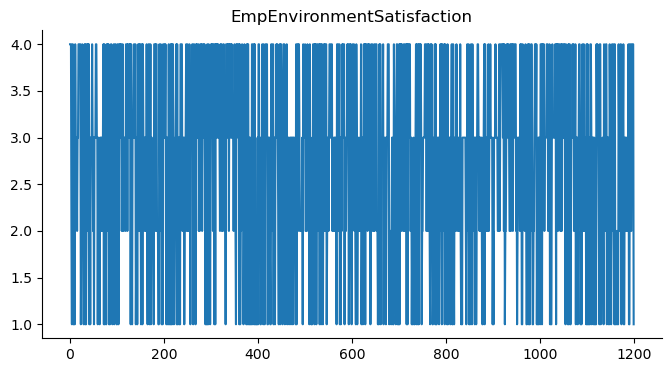

In [31]:

df['EmpEnvironmentSatisfaction'].plot(kind='line', figsize=(8, 4), title='EmpEnvironmentSatisfaction')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

### 2-d categorical distributions

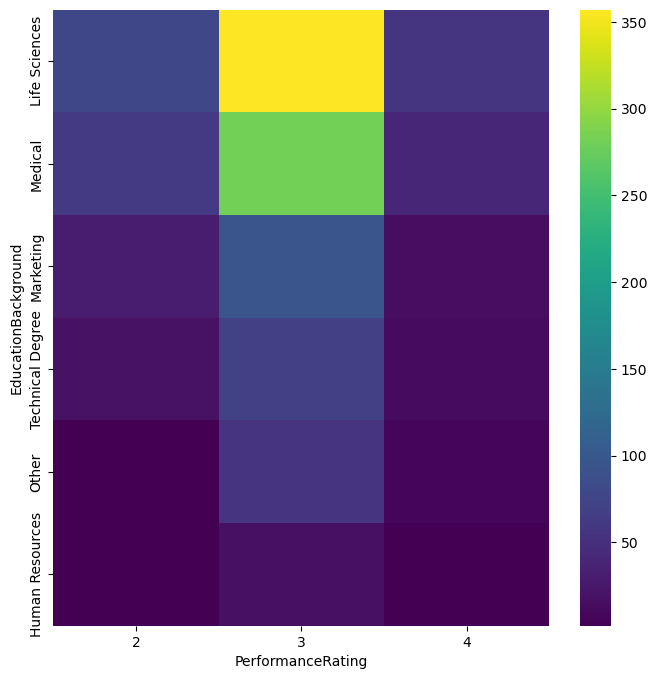

In [32]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['EducationBackground'].value_counts()
    for x_label, grp in df.groupby('PerformanceRating')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PerformanceRating')
_ = plt.ylabel('EducationBackground')
plt.show()

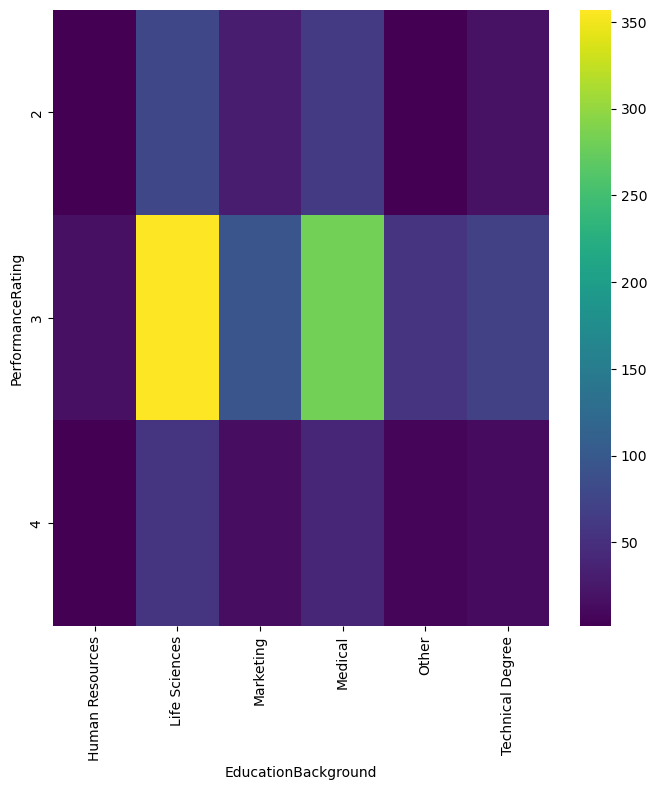

In [33]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PerformanceRating'].value_counts()
    for x_label, grp in df.groupby('EducationBackground')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('EducationBackground')
_ = plt.ylabel('PerformanceRating')
plt.show()

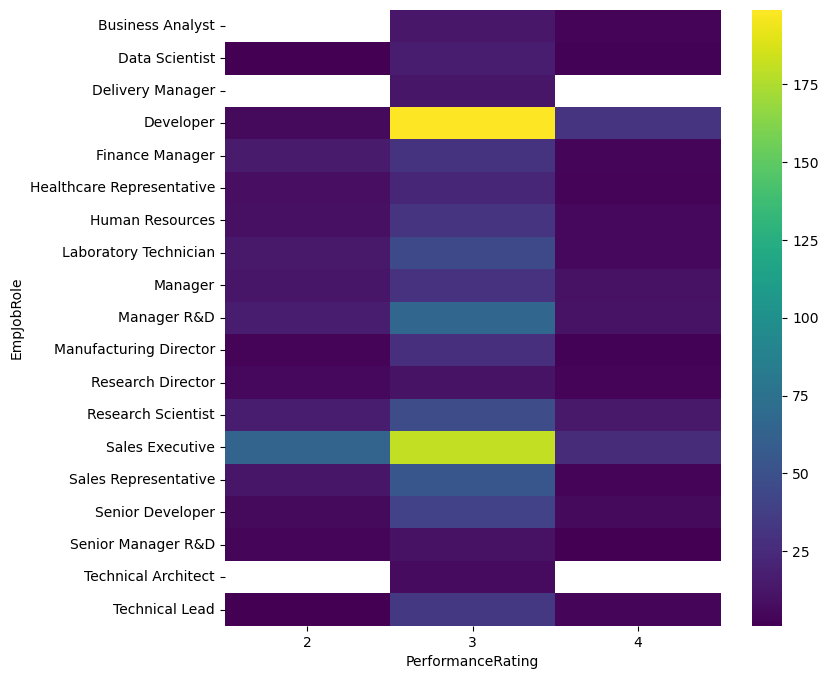

In [34]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['EmpJobRole'].value_counts()
    for x_label, grp in df.groupby('PerformanceRating')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PerformanceRating')
_ = plt.ylabel('EmpJobRole')
plt.show()

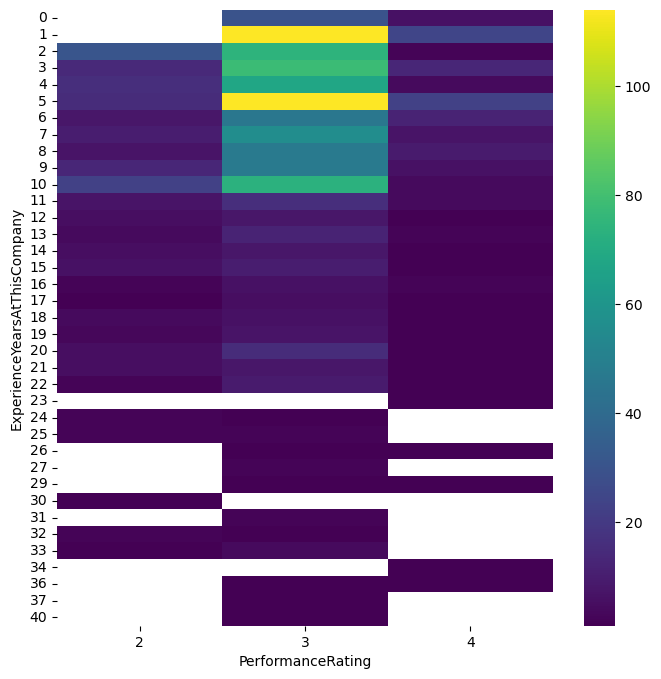

In [35]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ExperienceYearsAtThisCompany'].value_counts()
    for x_label, grp in df.groupby('PerformanceRating')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PerformanceRating')
_ = plt.ylabel('ExperienceYearsAtThisCompany')
plt.show()

### Faceted distributions

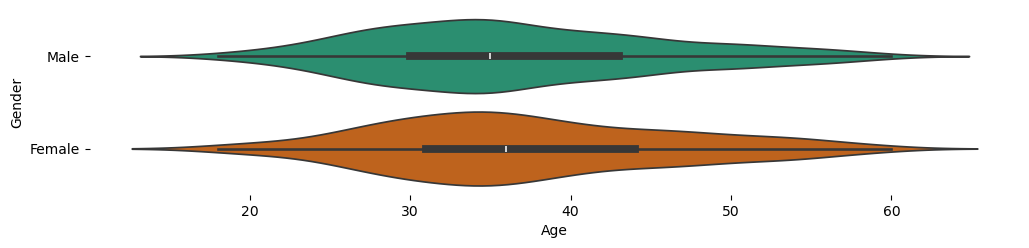

In [36]:

figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

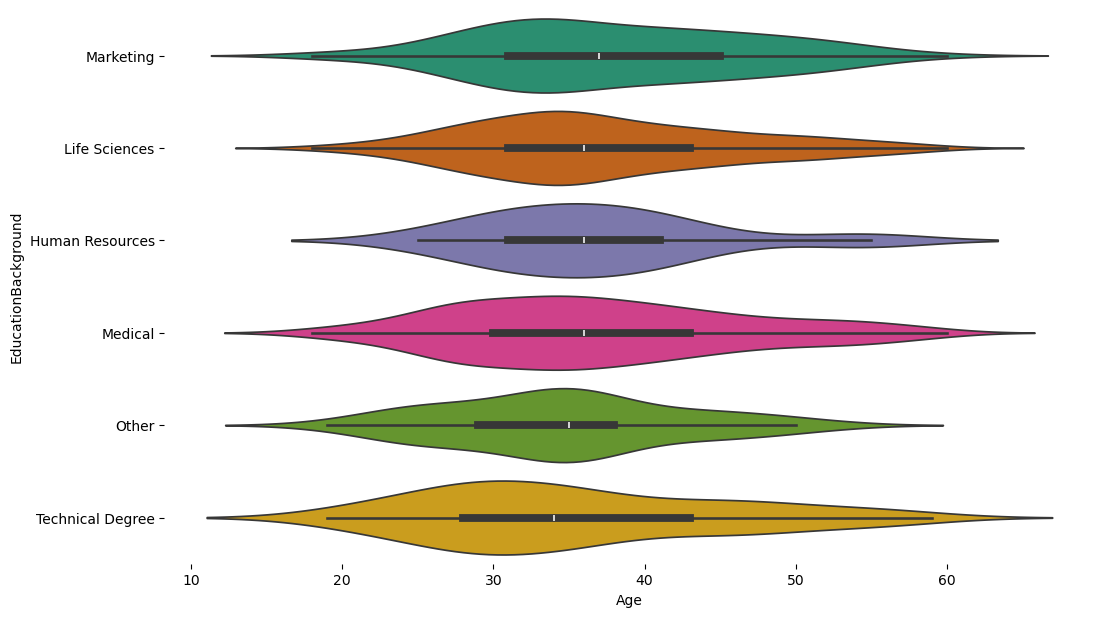

In [37]:

figsize = (12, 1.2 * len(df['EducationBackground'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='EducationBackground', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

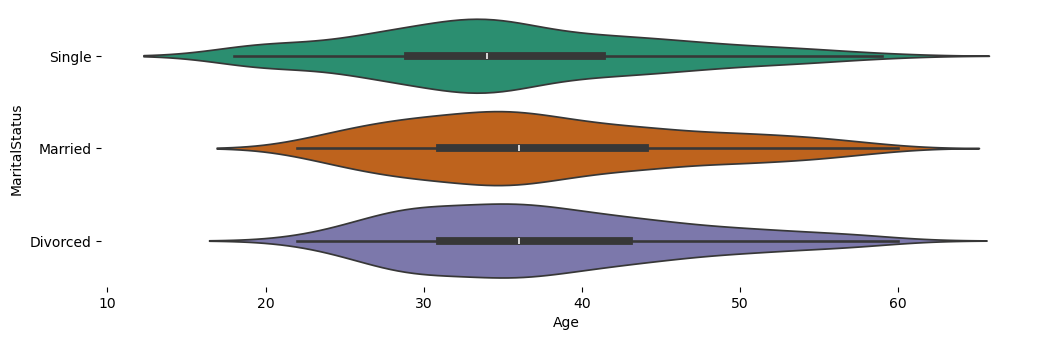

In [38]:

figsize = (12, 1.2 * len(df['MaritalStatus'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='MaritalStatus', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

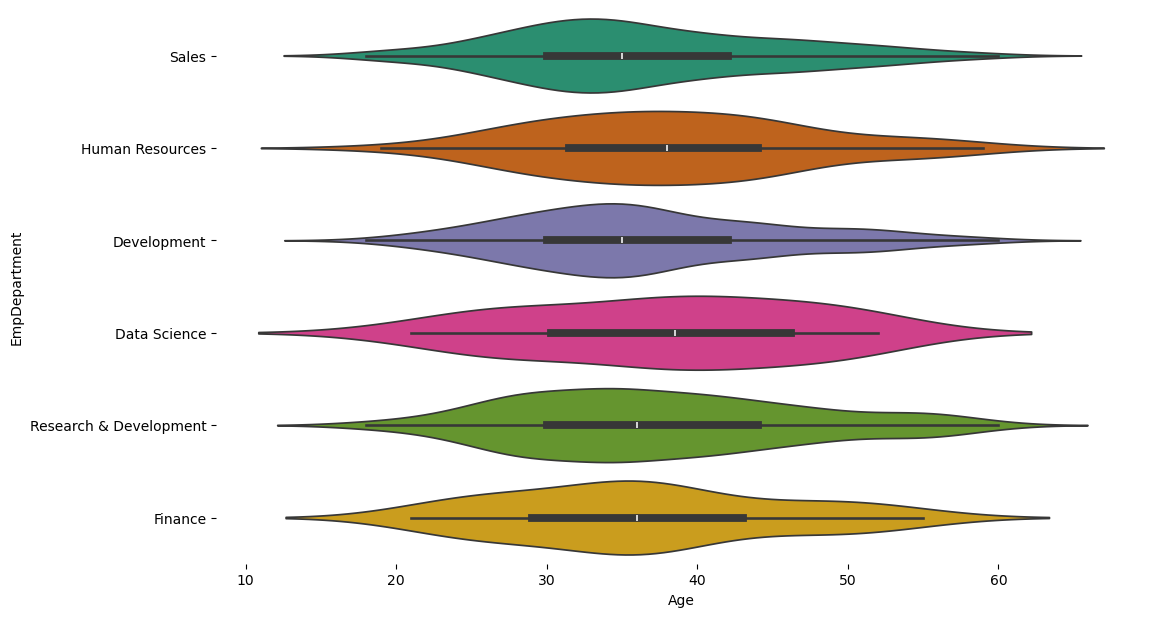

In [39]:

figsize = (12, 1.2 * len(df['EmpDepartment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='EmpDepartment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

In [40]:
sns.barplot(x='Gender', y='Age', hue='PerformanceRating', data=df)

<Axes: xlabel='Gender', ylabel='Age'>

The heights of the bars for each Performance Rating (represented in different colors) are almost the same for both genders.


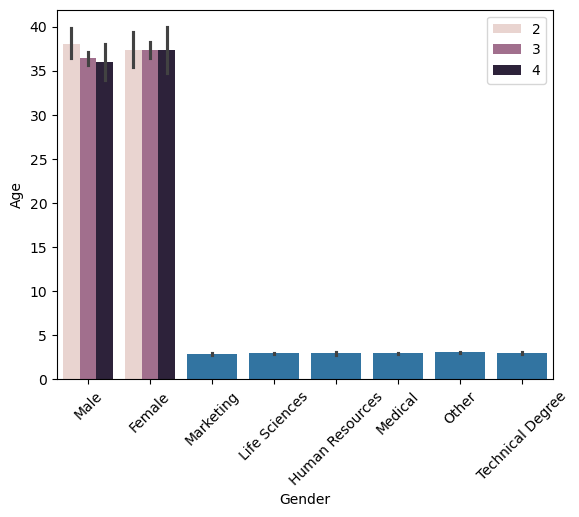

In [41]:
sns.barplot(x='EducationBackground', y='PerformanceRating', data=df)

plt.xticks(rotation=45)

plt.show()

## Task 1:- Department wise performances

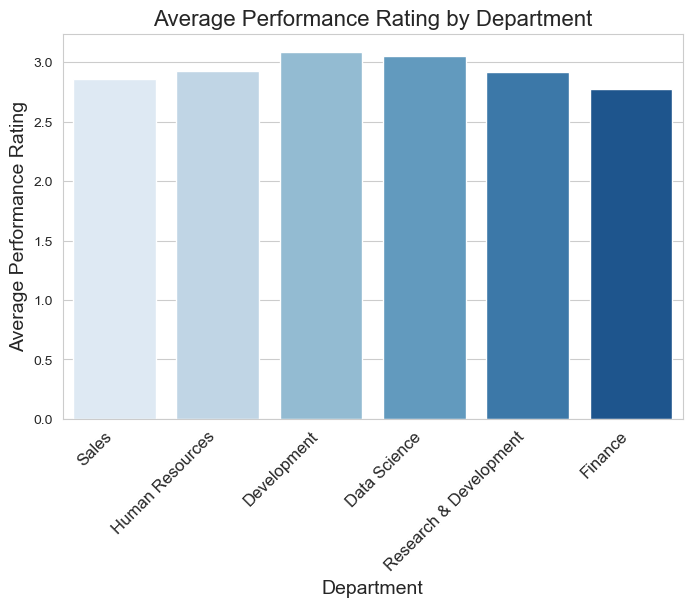

In [42]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))

sns.barplot(x='EmpDepartment', y='PerformanceRating', data=df, estimator=np.mean, ci=None, palette="Blues")

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.title("Average Performance Rating by Department", fontsize=16)

plt.xlabel("Department", fontsize=14)

plt.ylabel("Average Performance Rating", fontsize=14)
plt.show()

In [43]:
# New Dataframe is created to analyze department wise performance.
dept = df.iloc[:,[5,27]].copy()
dept_per = dept.copy()

In [44]:
# Finding the mean performance of all the departments and plotting bar graph using seaborn.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

In [45]:
plt.figure(figsize=(10,4.5))
sns.barplot(x=dept_per['EmpDepartment'], y=dept_per['PerformanceRating'])

<Axes: xlabel='EmpDepartment', ylabel='PerformanceRating'>

In [46]:
# Analyze all department separately
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

In [47]:
# Analyze all department separately
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

In [48]:
# Creating new Dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

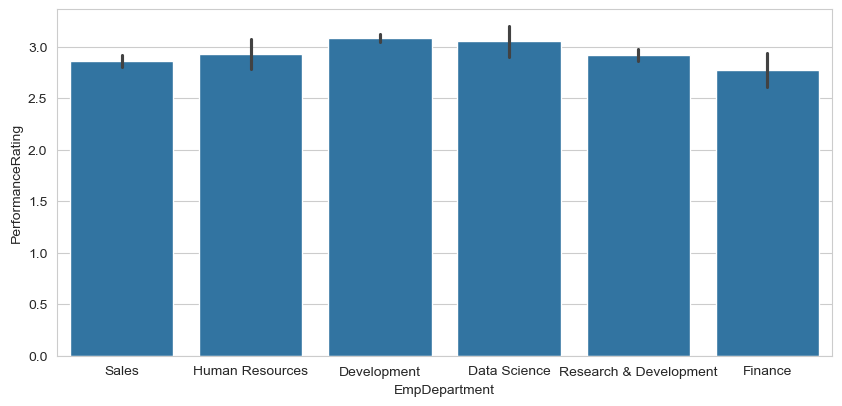

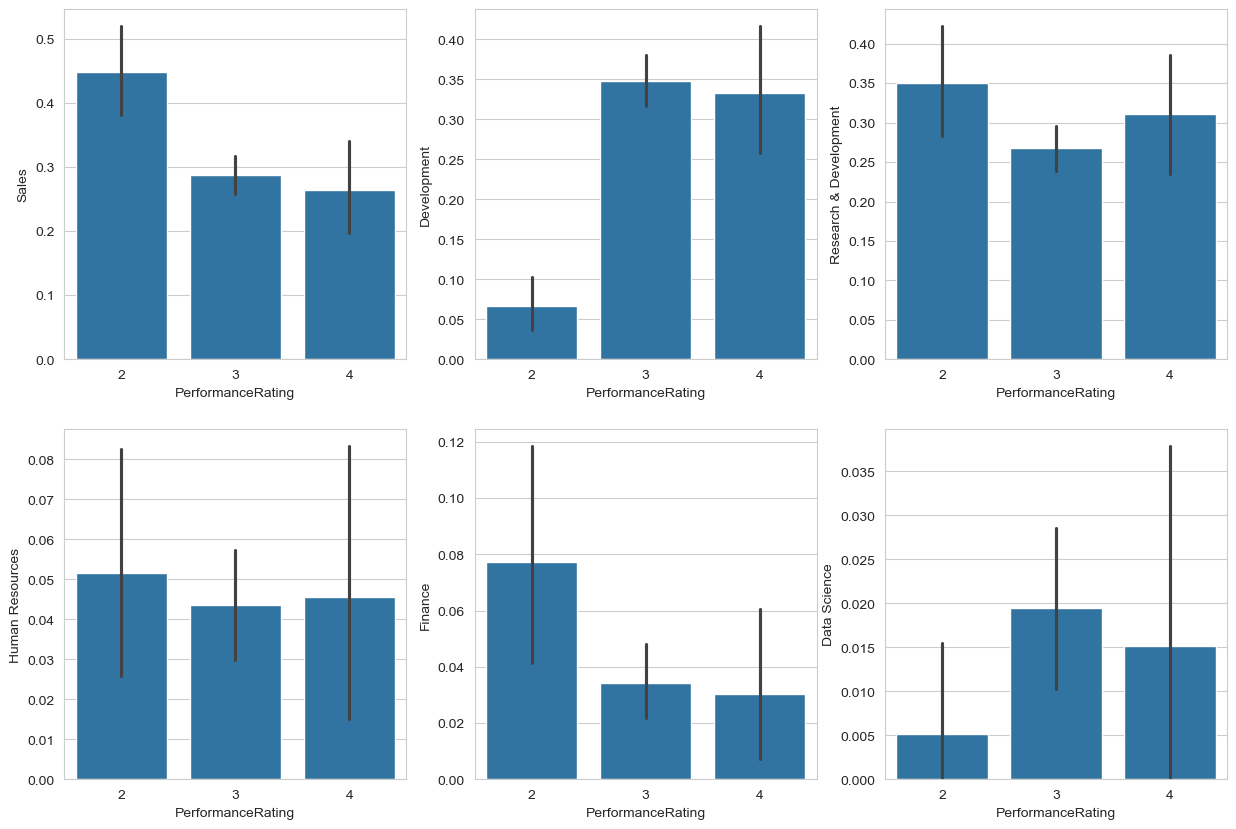

In [49]:
# Plotting separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Sales'])
plt.subplot(2,3,2)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Development'])
plt.subplot(2,3,3)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Research & Development'])
plt.subplot(2,3,4)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Human Resources'])
plt.subplot(2,3,5)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Finance'])
plt.subplot(2,3,6)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Data Science'])
plt.show()

# 5-EDA Exploratory Data Analysis

### Correlation Plot

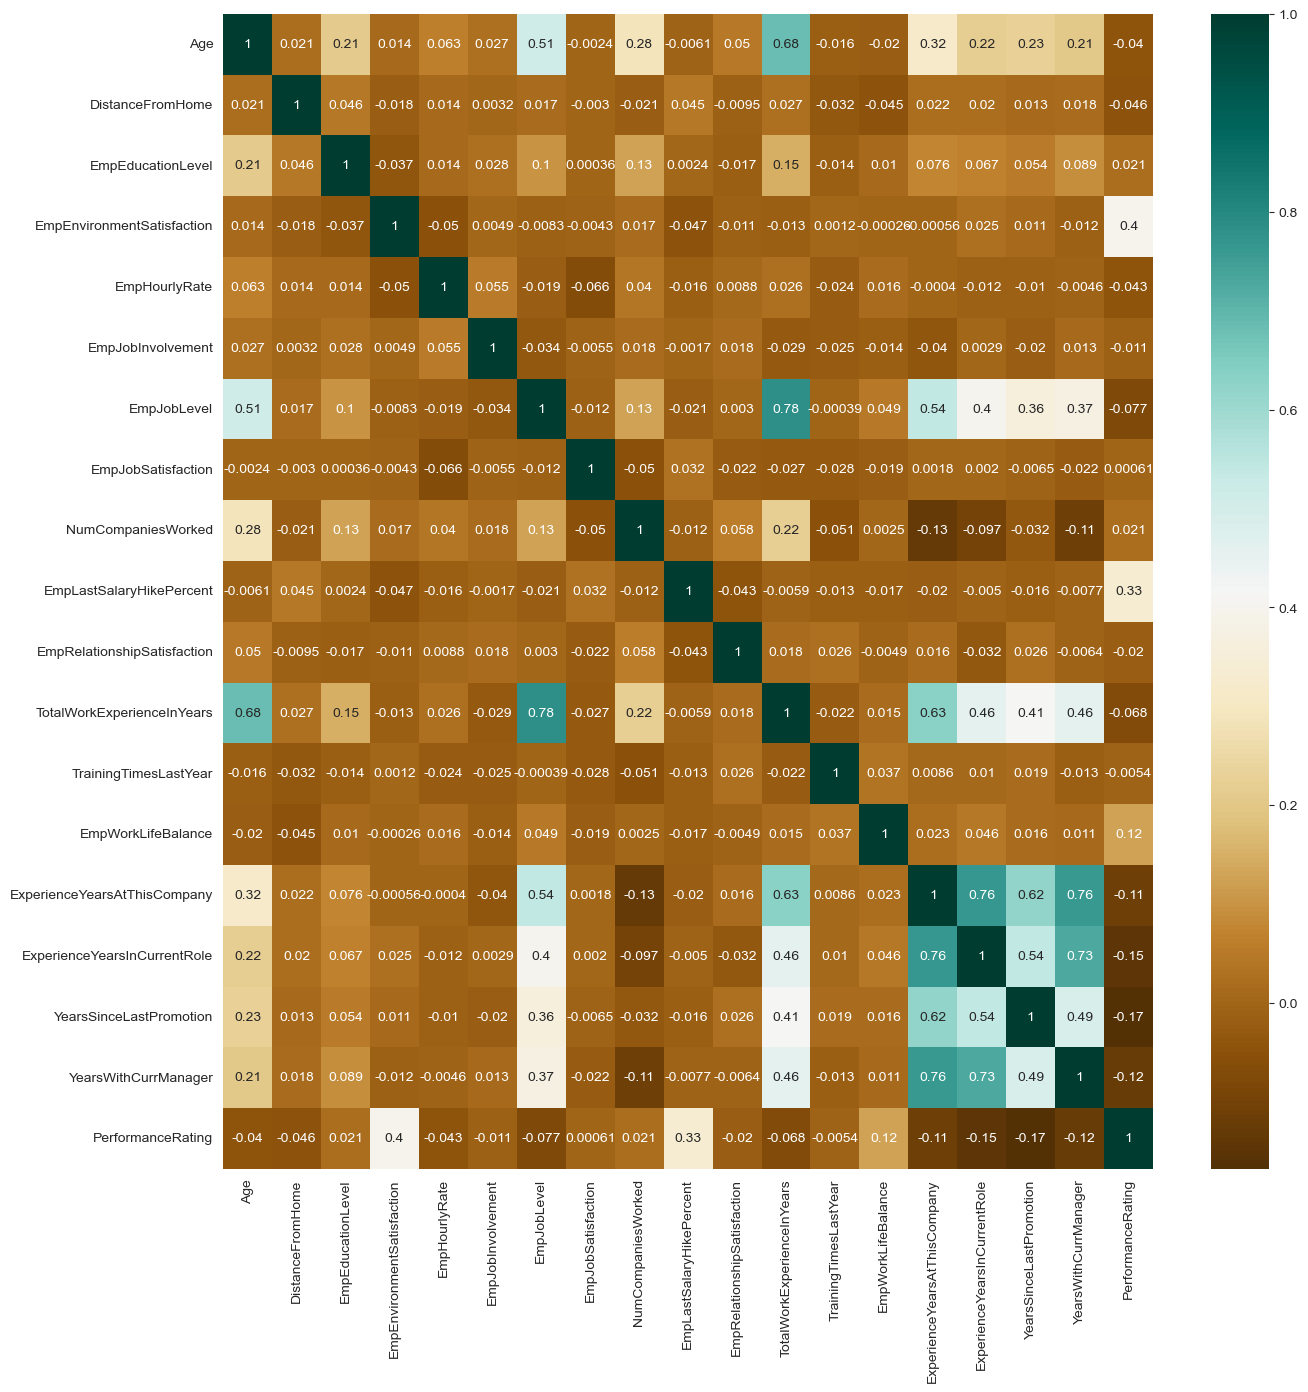

In [50]:
plt.figure(figsize=(15,15))#increase plot size

sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(),

            annot=True,

            cmap="BrBG",

            )
plt.show()

In [51]:
df.drop('EmpNumber',axis=1,inplace=True)

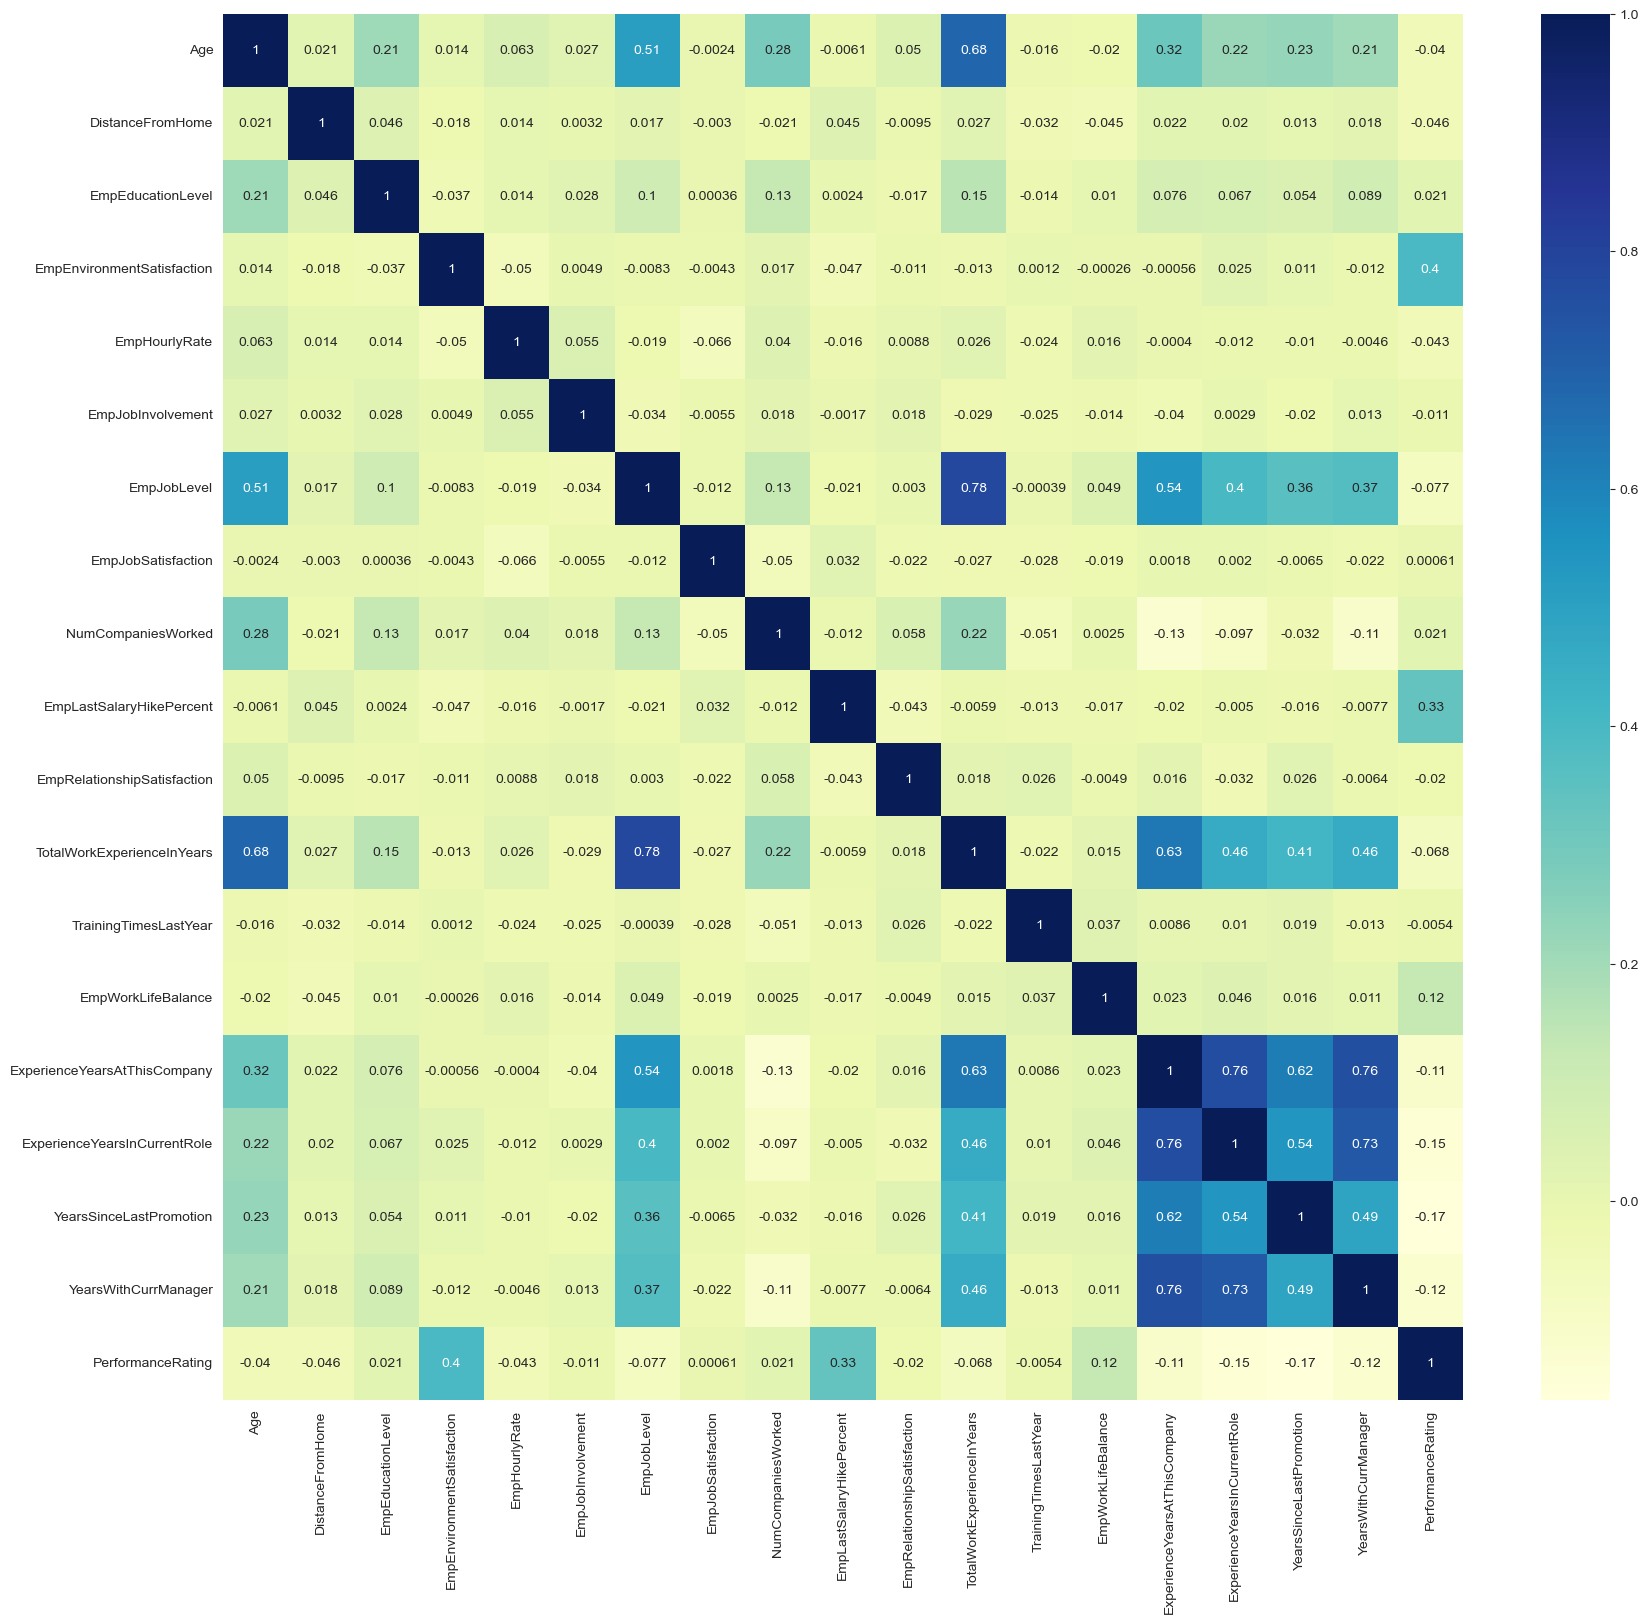

In [52]:
plt.figure(figsize=(20,18))
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(), cmap='YlGnBu',annot=True)
plt.show()

In [53]:
sns.pairplot(df, diag_kind='kde')

In [54]:
# checking for null values
pd.set_option("display.max_rows",None)
df.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

The raw data we have is completely clean. We checked for missing values but data contained no missing
values. To get proper prediction we need to do label encoding for categorical values

In [55]:
# Returns basic statistics on numeric columns
df.describe().T

count       mean        std   min   25%   50%  \
Age                           1200.0  36.918333   9.087289  18.0  30.0  36.0   
DistanceFromHome              1200.0   9.165833   8.176636   1.0   2.0   7.0   
EmpEducationLevel             1200.0   2.892500   1.044120   1.0   2.0   3.0   
EmpEnvironmentSatisfaction    1200.0   2.715833   1.090599   1.0   2.0   3.0   
EmpHourlyRate                 1200.0  65.981667  20.211302  30.0  48.0  66.0   
EmpJobInvolvement             1200.0   2.731667   0.707164   1.0   2.0   3.0   
EmpJobLevel                   1200.0   2.067500   1.107836   1.0   1.0   2.0   
EmpJobSatisfaction            1200.0   2.732500   1.100888   1.0   2.0   3.0   
NumCompaniesWorked            1200.0   2.665000   2.469384   0.0   1.0   2.0   
EmpLastSalaryHikePercent      1200.0  15.222500   3.625918  11.0  12.0  14.0   
EmpRelationshipSatisfaction   1200.0   2.725000   1.075642   1.0   2.0   3.0   
TotalWorkExperienceInYears    1200.0  11.330000   7.797228   0.0   6.0  10.0   
TrainingTimesLastYear         1200.0   2.785833   1.263446   0.0   2.0   3.0   
EmpWorkLifeBalance            1200.0   2.744167   0.699374   1.0   2.0   3.0   
ExperienceYearsAtThisCompany  1200.0   7.077500   6.236899   0.0   3.0   5.0   
ExperienceYearsInCurrentRole  1200.0   4.291667   3.613744   0.0   2.0   3.0   
YearsSinceLastPromotion       1200.0   2.194167   3.221560   0.0   0.0   1.0   
YearsWithCurrManager          1200.0   4.105000   3.541576   0.0   2.0   3.0   
PerformanceRating             1200.0   2.948333   0.518866   2.0   3.0   3.0   

                               75%    max  
Age                           43.0   60.0  
DistanceFromHome              14.0   29.0  
EmpEducationLevel              4.0    5.0  
EmpEnvironmentSatisfaction     4.0    4.0  
EmpHourlyRate                 83.0  100.0  
EmpJobInvolvement              3.0    4.0  
EmpJobLevel                    3.0    5.0  
EmpJobSatisfaction             4.0    4.0  
NumCompaniesWorked             4.0    9.0  
EmpLastSalaryHikePercent      18.0   25.0  
EmpRelationshipSatisfaction    4.0    4.0  
TotalWorkExperienceInYears    15.0   40.0  
TrainingTimesLastYear          3.0    6.0  
EmpWorkLifeBalance             3.0    4.0  
ExperienceYearsAtThisCompany  10.0   40.0  
ExperienceYearsInCurrentRole   7.0   18.0  
YearsSinceLastPromotion        3.0   15.0  
YearsWithCurrManager           7.0   17.0  
PerformanceRating              3.0    4.0

In [56]:
df.describe(include='object')

Gender EducationBackground MaritalStatus EmpDepartment  \
count    1200                1200          1200          1200   
unique      2                   6             3             6   
top      Male       Life Sciences       Married         Sales   
freq      725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

In [57]:
# checking for duplicates
df.duplicated().sum()

0

In [58]:
# Returns different datatypes for each columns
df.dtypes

Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager             int64
Attrition                

In [59]:
df['BusinessTravelFrequency'].value_counts()

BusinessTravelFrequency
Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: count, dtype: int64

In [60]:
df['Attrition'].value_counts()

Attrition
No     1022
Yes     178
Name: count, dtype: int64

In [61]:
df['OverTime'].value_counts()

OverTime
No     847
Yes    353
Name: count, dtype: int64

In [62]:
df['Gender'].value_counts()

Gender
Male      725
Female    475
Name: count, dtype: int64

In [63]:
df['EducationBackground'].value_counts()

EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

In [64]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

In [65]:
df['EmpJobRole'].value_counts()

EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: count, dtype: int64

In [66]:
df['EmpDepartment'].value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [67]:
num=df[['Age', 'EducationBackground', 'MaritalStatus','EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency','DistanceFromHome', 'EmpEducationLevel','EmpEnvironmentSatisfaction','EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel','EmpJobSatisfaction', 'NumCompaniesWorked','EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','TotalWorkExperienceInYears', 'TrainingTimesLastYear','EmpWorkLifeBalance','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'PerformanceRating']]
plt.figure(figsize=(20,20))
plotnumber=1
for columns in num:
    if plotnumber <=30:
        plt.subplot(7,4,plotnumber)
        sns.histplot(x=df[columns],kde=True)
        plt.xlabel(columns,fontsize=10)
        plt.ylabel('count',fontsize=10)
    plotnumber+=1
plt.tight_layout


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

#### To enhance our dataset for predictive modeling, we will systematically apply feature engineering techniques tailored to the three types of columns present. First, we will convert categorical columns, such as gender and education background, into numerical representations using onehot encoding. This process assigns unique integers to each category, facilitating their use in machine learning algorithms. Next, we will address the discrete columns, which already follow a proper order. We will map these ordinal values to integers to ensure they are numerically represented. Finally, we will standardize the continuous columns, such as employee hourly rates and job satisfaction scores, using the StandardScaler method. This will normalize the data, bringing all continuous variables to a common scale with a mean of zero and a standard deviation of one. By implementing these transformations, we will create a robust dataset that improves model performance and predictive accuracy.


# 6-Data preprocessing

In [68]:
continuous_columns=['Age','DistanceFromHome','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',

                    'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']



Discrete_columns=['EmpRelationshipSatisfaction','EmpEnvironmentSatisfaction','EmpWorkLifeBalance','EmpHourlyRate','EmpJobInvolvement',

                  'EmpJobLevel','EmpJobSatisfaction','EmpLastSalaryHikePercent','NumCompaniesWorked']

categorical_columns=['Gender', 'EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency',

                     'OverTime','Attrition']

ordinal_columns=['EmpEducationLevel']


## Data Encoding/Data wrangling

### Handling categorical column

In [69]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()

for i in categorical_columns:

  df[i]=ohe.fit_transform(df[[i]]).toarray()






In [70]:
#ordinal encoding

from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()

df['EmpEducationLevel']=oe.fit_transform(df[['EmpEducationLevel']])

In [71]:
#LABLE ENCODER

col_2 = ['OverTime','Attrition']

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in col_2:

  df[i]=le.fit_transform(df[i])






### Feature Scaling

In [72]:
# standatd scalr on numerical columns

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

df[continuous_columns]=ss.fit_transform(df[continuous_columns])


### Feature Selection

In [73]:
df.corr()

Age    Gender  EducationBackground  \
Age                           1.000000  0.040107            -0.000199   
Gender                        0.040107  1.000000            -0.017057   
EducationBackground          -0.000199 -0.017057             1.000000   
MaritalStatus                 0.039185 -0.033074             0.019990   
EmpDepartment                 0.015503  0.001109            -0.017375   
EmpJobRole                   -0.014152 -0.019809            -0.015514   
BusinessTravelFrequency      -0.022935 -0.055823             0.014015   
DistanceFromHome              0.020937  0.001507             0.007401   
EmpEducationLevel             0.207313  0.022960             0.044193   
EmpEnvironmentSatisfaction    0.013814 -0.000033            -0.017679   
EmpHourlyRate                 0.062867 -0.002218            -0.022528   
EmpJobInvolvement             0.027216 -0.010949             0.023691   
EmpJobLevel                   0.509139  0.050685             0.003343   
EmpJobSatisfaction           -0.002436 -0.024680            -0.036861   
NumCompaniesWorked            0.284408  0.036675             0.041285   
OverTime                     -0.051910 -0.038410            -0.011472   
EmpLastSalaryHikePercent     -0.006105  0.005319            -0.020467   
EmpRelationshipSatisfaction   0.049749 -0.030707             0.028224   
TotalWorkExperienceInYears    0.680886  0.061055             0.005765   
TrainingTimesLastYear        -0.016053  0.057654            -0.032722   
EmpWorkLifeBalance           -0.019563 -0.015793            -0.005705   
ExperienceYearsAtThisCompany  0.318852  0.030392            -0.003698   
ExperienceYearsInCurrentRole  0.217163  0.031823            -0.023092   
YearsSinceLastPromotion       0.228199  0.021575            -0.025809   
YearsWithCurrManager          0.205098  0.036643            -0.016525   
Attrition                     0.189317  0.035758            -0.033705   
PerformanceRating            -0.040164  0.001780             0.001042   

                              MaritalStatus  EmpDepartment  EmpJobRole  \
Age                                0.039185       0.015503   -0.014152   
Gender                            -0.033074       0.001109   -0.019809   
EducationBackground                0.019990      -0.017375   -0.015514   
MaritalStatus                      1.000000       0.039595    0.024888   
EmpDepartment                      0.039595       1.000000   -0.015134   
EmpJobRole                         0.024888      -0.015134    1.000000   
BusinessTravelFrequency            0.067274      -0.045769   -0.017648   
DistanceFromHome                   0.001360       0.007712   -0.039694   
EmpEducationLevel                 -0.017619      -0.017775    0.005012   
EmpEnvironmentSatisfaction         0.046174       0.027965   -0.043009   
EmpHourlyRate                      0.001081      -0.024047   -0.015358   
EmpJobInvolvement                  0.022400       0.031003   -0.048377   
EmpJobLevel                        0.046816       0.003821   -0.000525   
EmpJobSatisfaction                -0.044203      -0.003845   -0.031163   
NumCompaniesWorked                 0.047648      -0.029800   -0.037205   
OverTime                          -0.027064       0.041190    0.043157   
EmpLastSalaryHikePercent          -0.012493       0.044092    0.006896   
EmpRelationshipSatisfaction        0.018051      -0.027244    0.016218   
TotalWorkExperienceInYears         0.054312       0.012862   -0.006786   
TrainingTimesLastYear             -0.002540       0.016923   -0.014804   
EmpWorkLifeBalance                -0.006974      -0.045471    0.052934   
ExperienceYearsAtThisCompany       0.045328      -0.025633   -0.036407   
ExperienceYearsInCurrentRole       0.029266      -0.046553   -0.023466   
YearsSinceLastPromotion            0.020482      -0.026043   -0.025059   
YearsWithCurrManager               0.040051      -0.011217   -0.028076   
Attrition                          0.077425       0.017704    0.02

In [74]:
plt.figure(figsize=(15,15))#increase plot size

sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(),

            annot=True,

            cmap="BrBG",

            )

<Axes: >

In [75]:
X=df.drop('PerformanceRating',axis=1)

y=df['PerformanceRating']


In [76]:
X.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0 -0.541458     0.0                  0.0            0.0            0.0   
1  1.109888     0.0                  0.0            0.0            0.0   
2  0.339260     0.0                  0.0            0.0            0.0   
3  0.449349     0.0                  1.0            1.0            0.0   
4  2.541054     0.0                  0.0            0.0            0.0   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0         0.0                      0.0          0.102061                2.0   
1         0.0                      0.0          0.591464                3.0   
2         0.0                      0.0         -0.509693                3.0   
3         0.0                      0.0          0.102061                3.0   
4         0.0                      0.0          0.836165                3.0   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         1                        12   
1                   1                   2         1                        12   
2                   1                   5         0                        21   
3                   4                   3         1                        15   
4                   1                   8         1                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                   -0.170645   
1                            4                    1.112397   
2                            3                    1.112397   
3                            2                    1.497310   
4                            4                   -0.170645   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0              -0.622235                   2                      0.468778   
1              -0.622235                   3                     -0.012431   
2              -0.622235                   3                      1.752001   
3              -0.622235                   2                      2.233210   
4              -1.414051                   3                     -0.814446   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                      0.749766                -0.681372   
1                      0.749766                -0.370834   
2                      2.410786                -0.370834   
3                      0.472929                 3.045084   
4                     -0.634417                -0.060296   

   YearsWithCurrManager  Attrition  
0              1.100251          1  
1              0.817773          1  
2              2.230163          1  
3              0.535296          1  
4             -0.594616          1

In [77]:
df.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0 -0.541458     0.0                  0.0            0.0            0.0   
1  1.109888     0.0                  0.0            0.0            0.0   
2  0.339260     0.0                  0.0            0.0            0.0   
3  0.449349     0.0                  1.0            1.0            0.0   
4  2.541054     0.0                  0.0            0.0            0.0   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0         0.0                      0.0          0.102061                2.0   
1         0.0                      0.0          0.591464                3.0   
2         0.0                      0.0         -0.509693                3.0   
3         0.0                      0.0          0.102061                3.0   
4         0.0                      0.0          0.836165                3.0   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         1                        12   
1                   1                   2         1                        12   
2                   1                   5         0                        21   
3                   4                   3         1                        15   
4                   1                   8         1                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                   -0.170645   
1                            4                    1.112397   
2                            3                    1.112397   
3                            2                    1.497310   
4                            4                   -0.170645   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0              -0.622235                   2                      0.468778   
1              -0.622235                   3                     -0.012431   
2              -0.622235                   3                      1.752001   
3              -0.622235                   2                      2.233210   
4              -1.414051                   3                     -0.814446   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                      0.749766                -0.681372   
1                      0.749766                -0.370834   
2                      2.410786                -0.370834   
3                      0.472929                 3.045084   
4                     -0.634417                -0.060296   

   YearsWithCurrManager  Attrition  PerformanceRating  
0              1.100251          1                  3  
1              0.817773          1                  3  
2              2.230163          1                  4  
3              0.535296          1                  3  
4             -0.594616          1                  3

### Train-Test Split

In [78]:
from sklearn.model_selection import train_test_split

from sklearn import model_selection

X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
df['PerformanceRating'].value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

In [80]:
#weight  of each y_train

print(874/194)

print(874/132)






4.505154639175258
6.621212121212121


### Balancing The data

In [81]:
from sklearn.utils import compute_sample_weight

sample_weights=compute_sample_weight(class_weight={3:1,2:4,4:6},y=y_train)

# 7- Modelling

## Task 3:-

## Model 1: ML Algorithm (Random Forest)

In [82]:
from sklearn.ensemble import RandomForestClassifier



rf=RandomForestClassifier()

rf.fit(X_train,y_train,sample_weight=sample_weights)




RandomForestClassifier()

In [83]:
# test the model

y_pred=rf.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

0.8916666666666667
[[ 25   4   0]
 [ 14 170   0]
 [  0   8  19]]
              precision    recall  f1-score   support

           2       0.64      0.86      0.74        29
           3       0.93      0.92      0.93       184
           4       1.00      0.70      0.83        27

    accuracy                           0.89       240
   macro avg       0.86      0.83      0.83       240
weighted avg       0.91      0.89      0.89       240



In [84]:
#setting up hyperparameter grid

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

param_grid = {

    'n_estimators': [50, 100, 200],

    'max_depth': [None, 10, 20, 30, 50],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 2, 4],

    'max_features': ['auto', 'sqrt', 'log2']

}

rf=RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train,sample_weight=sample_weights)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred=grid_search.predict(X_test)

print(accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

0.9
[[ 26   3   0]
 [ 14 170   0]
 [  0   7  20]]
              precision    recall  f1-score   support

           2       0.65      0.90      0.75        29
           3       0.94      0.92      0.93       184
           4       1.00      0.74      0.85        27

    accuracy                           0.90       240
   macro avg       0.86      0.85      0.85       240
weighted avg       0.92      0.90      0.90       240



###  Important Factors effecting employee performance

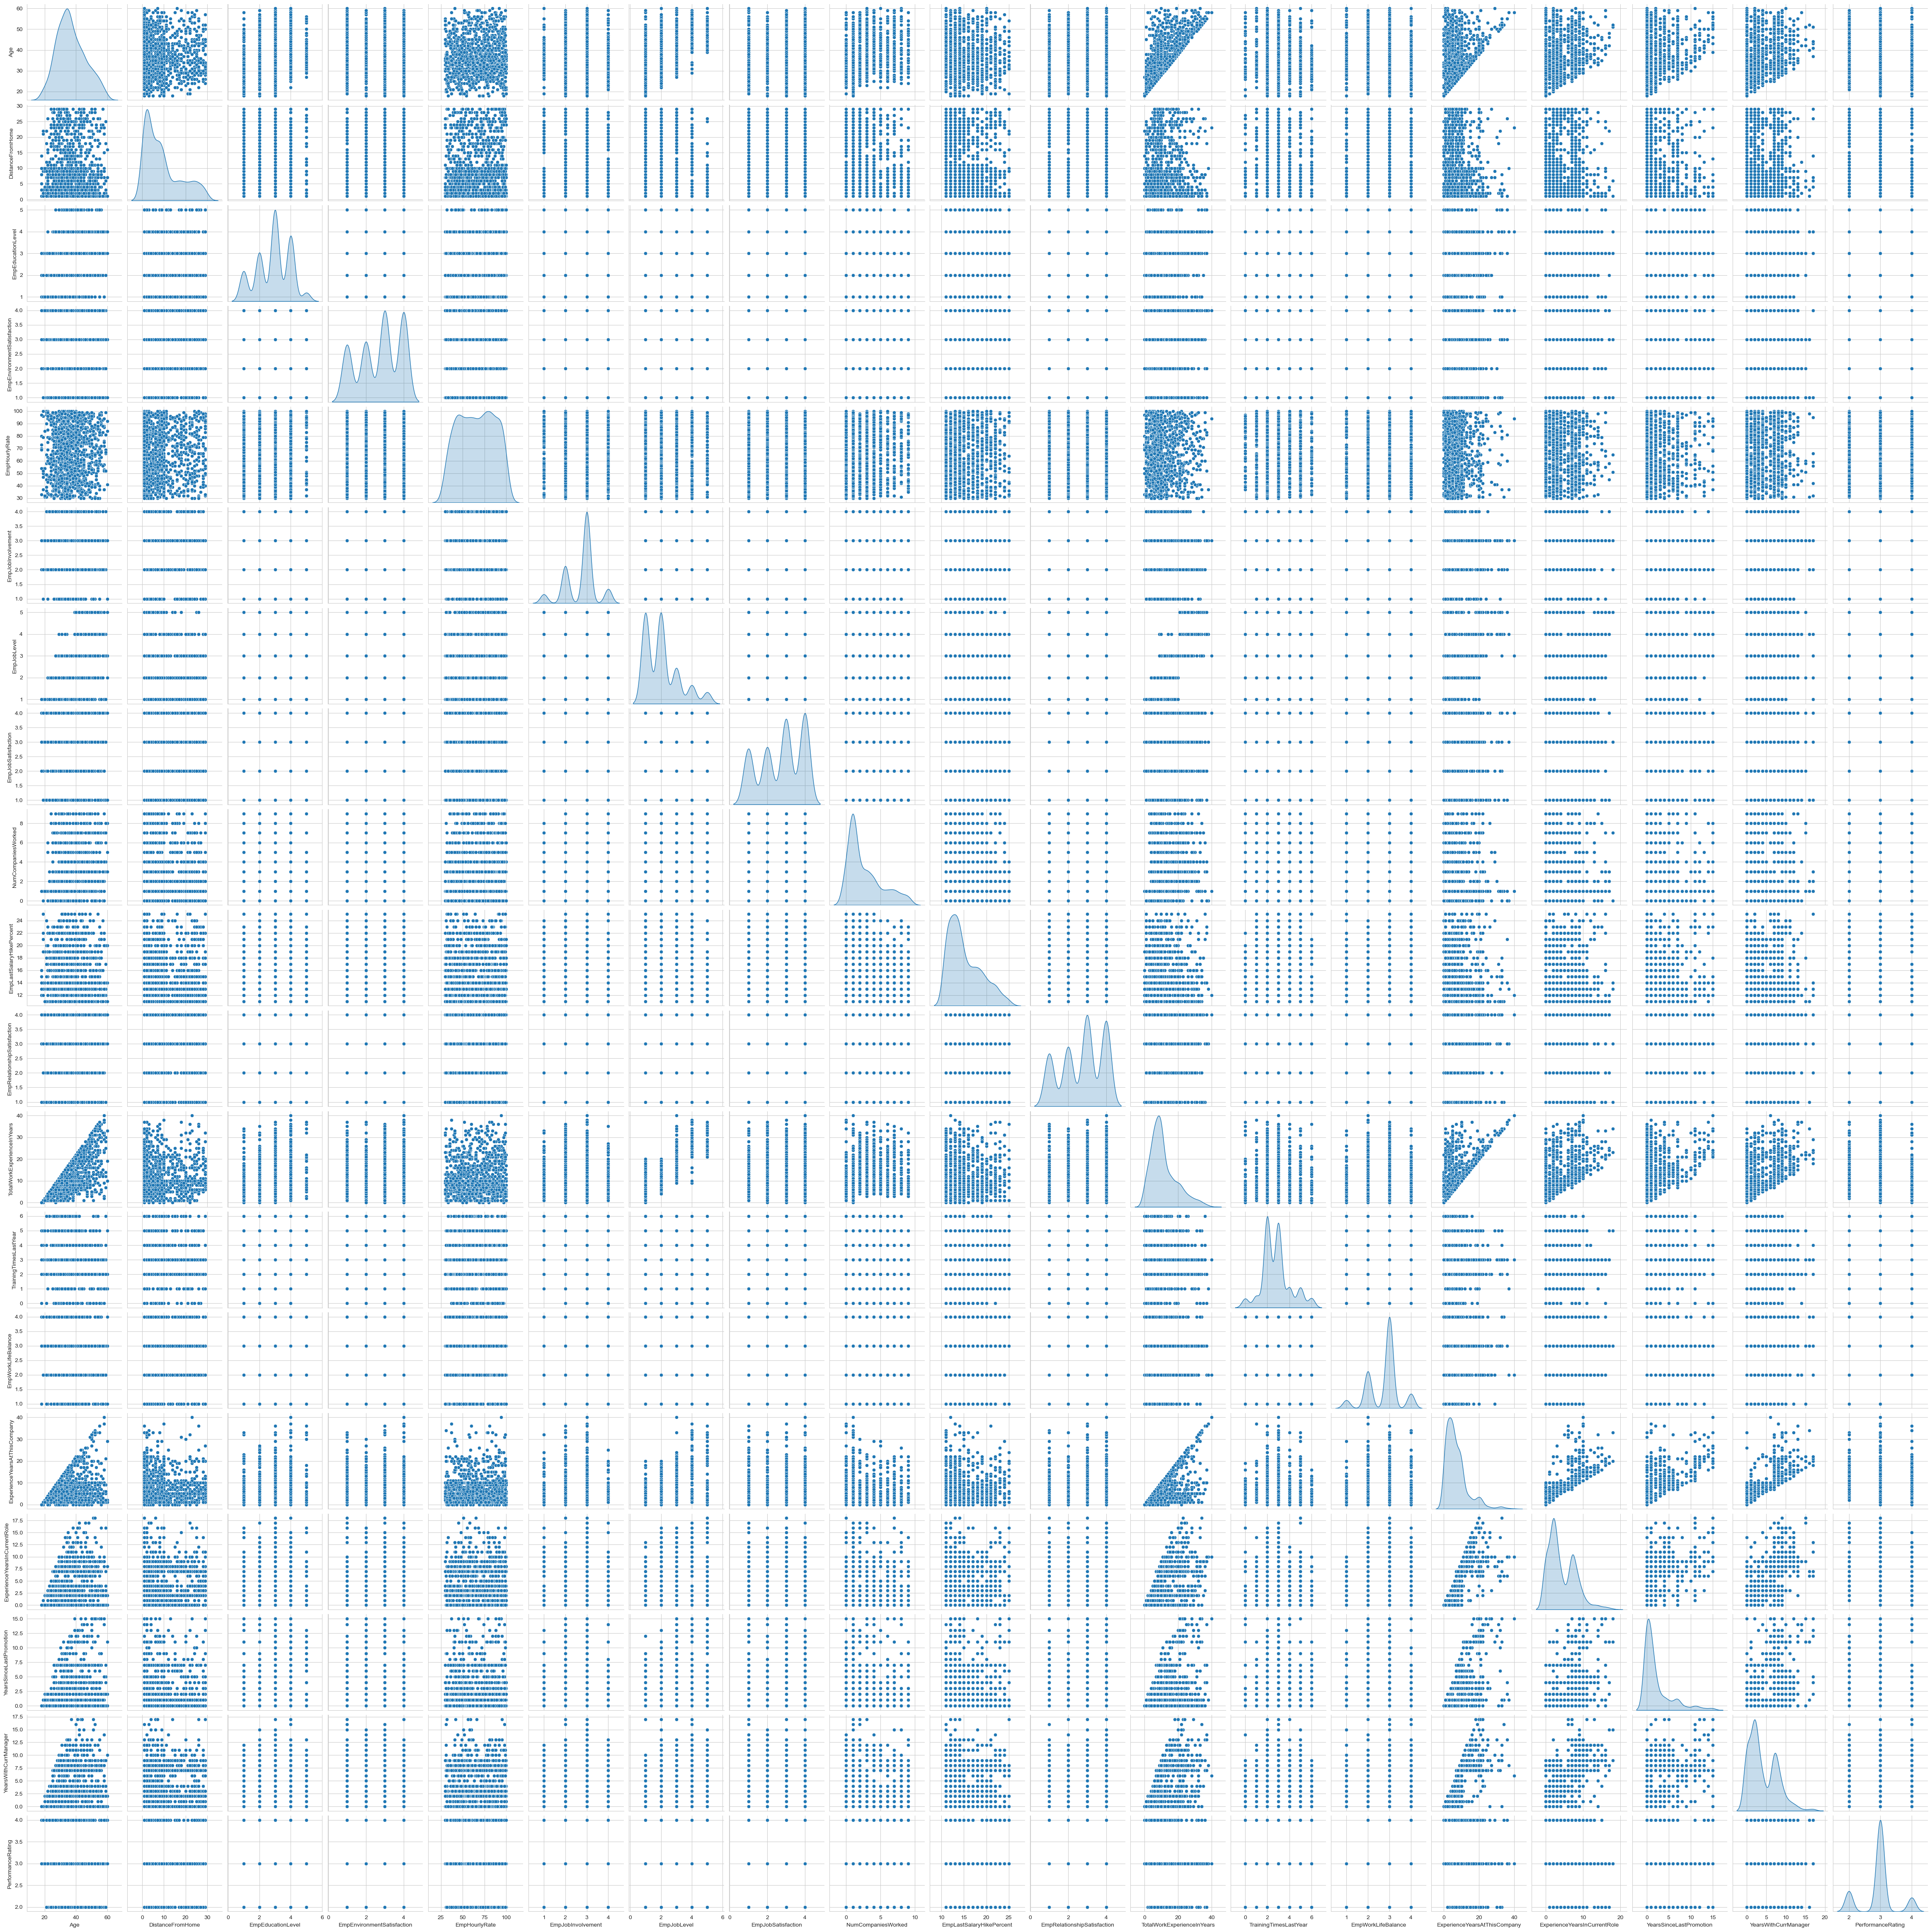

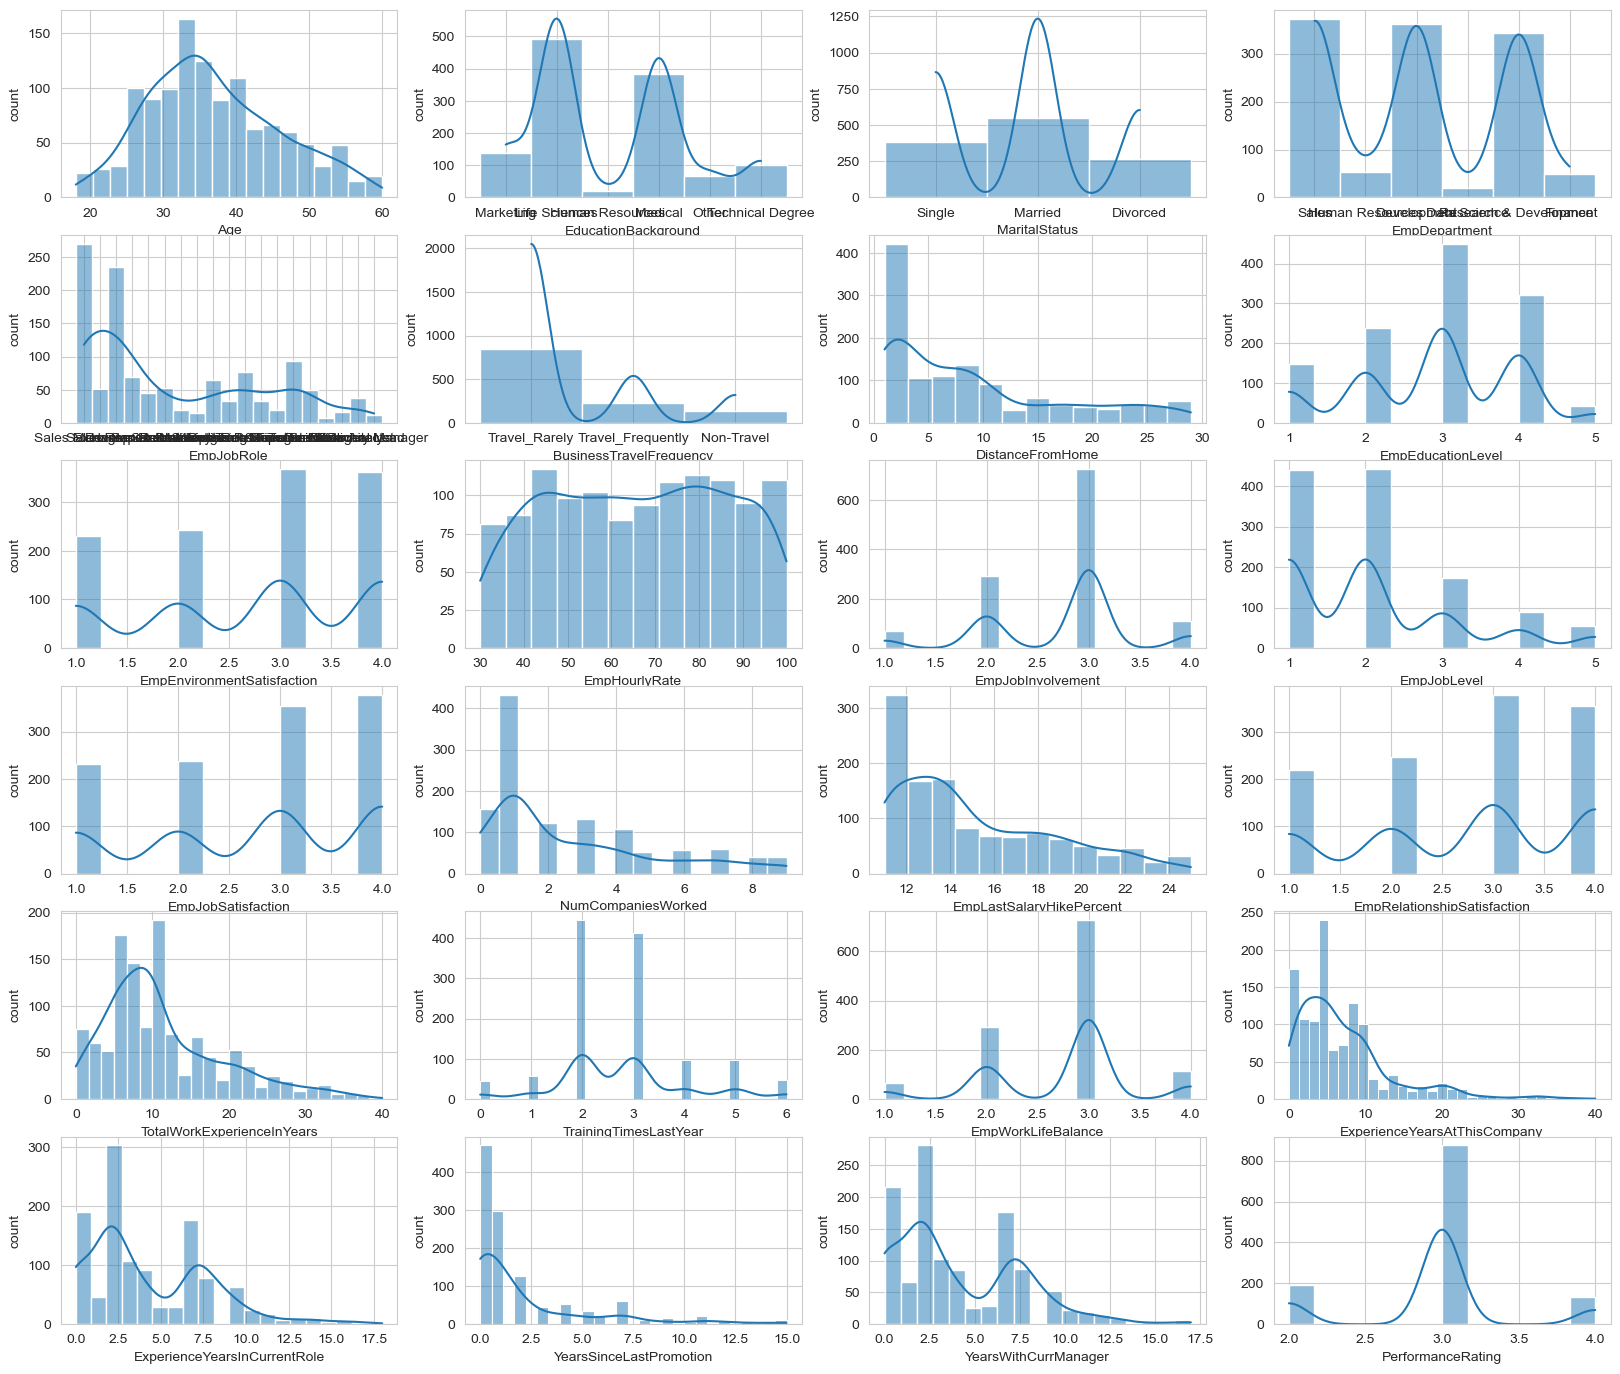

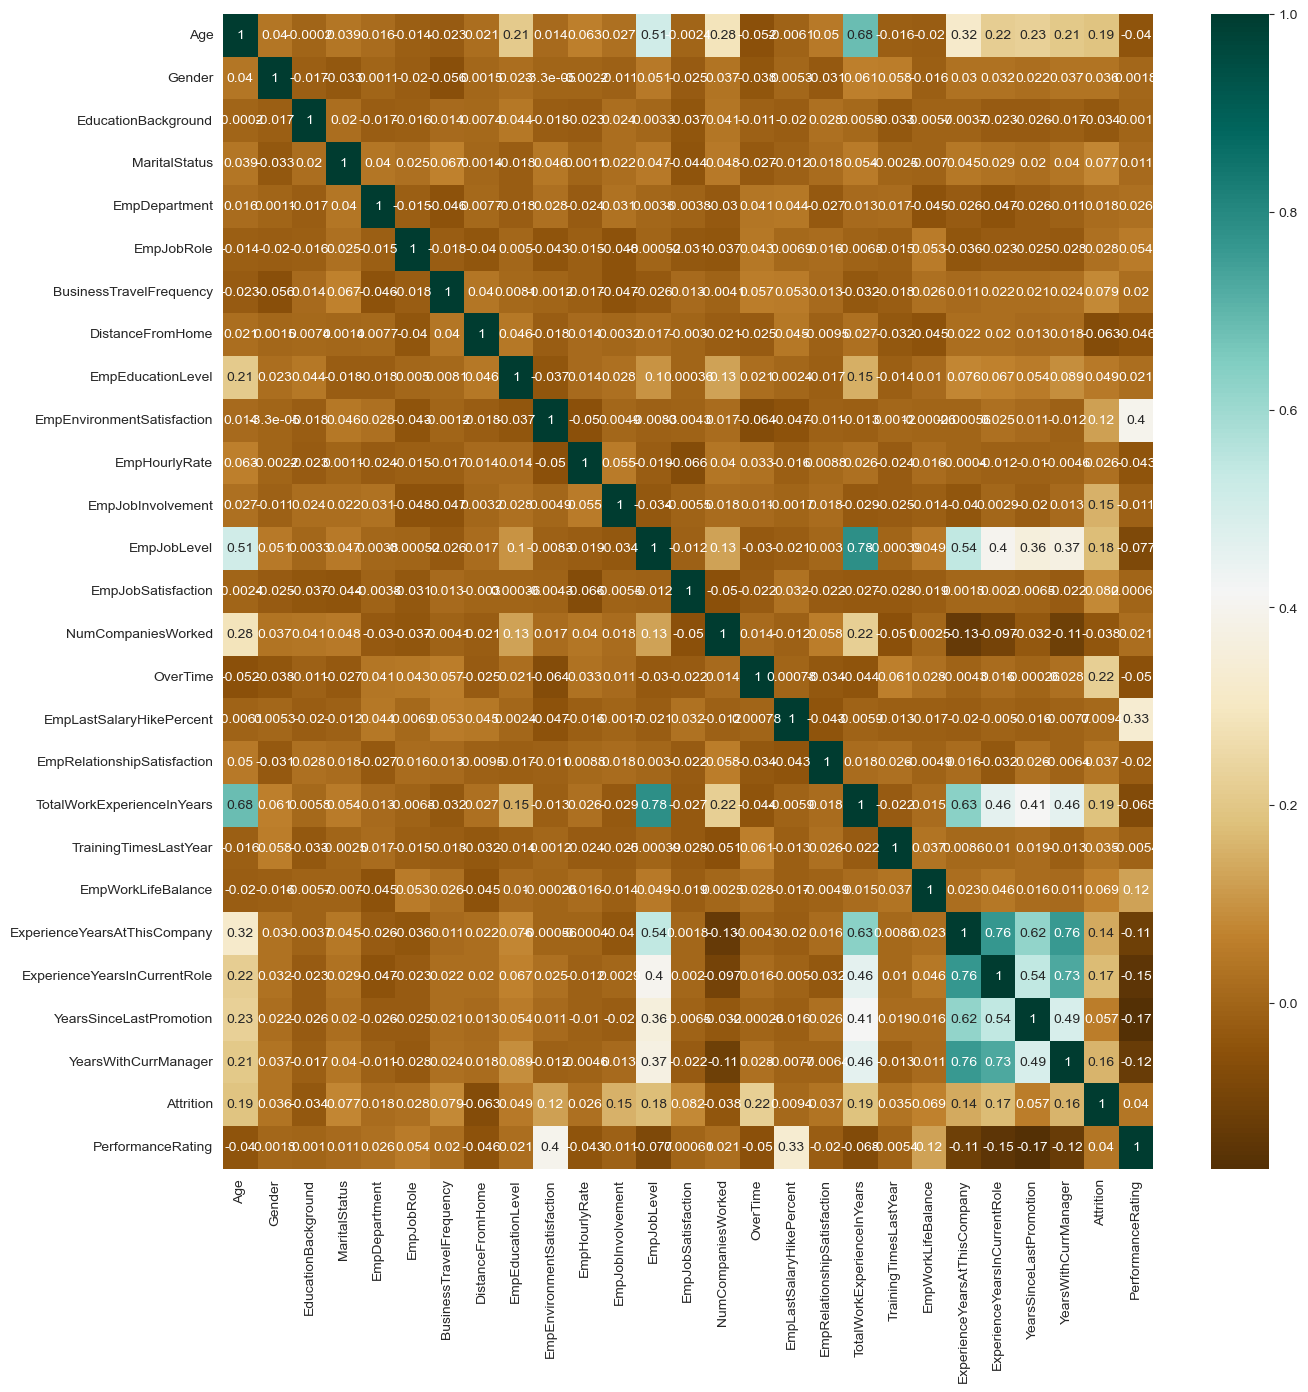

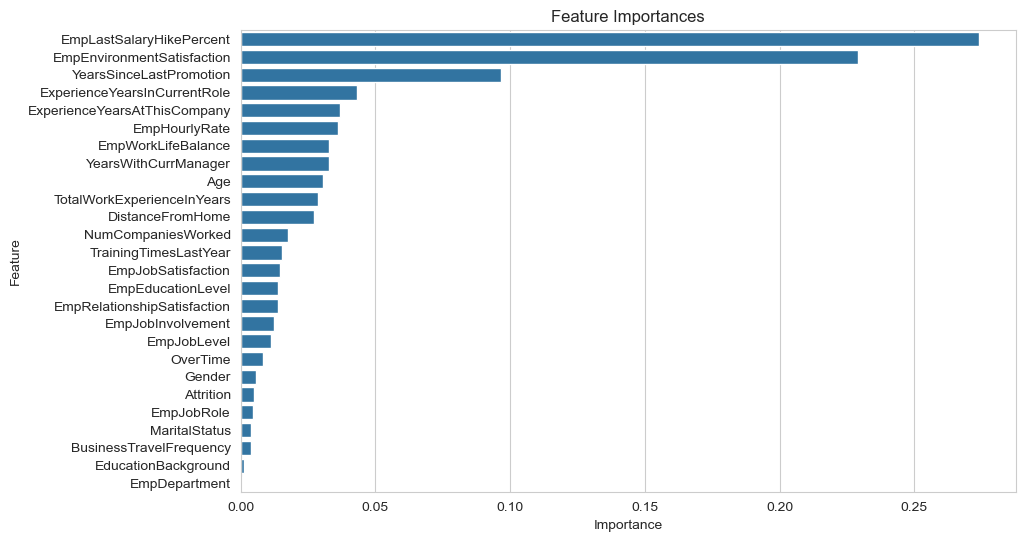

In [86]:
importances = grid_search.best_estimator_.feature_importances_

feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x='Importance', y='Feature', data=feature_importances)

plt.title('Feature Importances')

plt.xlabel('Importance')
plt.show()

## Task 4:-
###  Ater conducting a thorough analysis and visualizing our predictive model, we have identified several areas where improvements can significantly impact employee performance. Although factors such as **education background, employee department, and business travel** currently show lower contributions to performance metrics, enhancing these areas could yield beneficial outcomes for our organization. We can foster an environment that supports continuous improvement, ultimately leading to greater employee satisfaction and performance.




## Model 2: ML Algorithm (SVM)

In [87]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Optional: If not already normalized
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature Scaling for better SVM performance
    ('svc', SVC(probability=True))
])

# Hyperparameter grid (more refined)
param_grid = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
    'svc__kernel': ['linear', 'rbf', 'poly']
}

# Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # Increase CV folds for stability
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Fit (remove sample_weight if not defined)
grid_search.fit(X_train, y_train)  # or include sample_weight if used

# Best Score and Parameters
print("Best Accuracy: ", grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)

# Final Model Evaluation on Test Set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Accuracy:  0.7822916666666667
Best Parameters:  {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Test Accuracy:  0.7958333333333333


## Model 3: ML Algorithm (ANN)

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# Step 1: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Resample using SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 3: Build a more robust MLP Classifier
model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # Deeper architecture
    activation='relu',
    solver='adam',
    alpha=0.0005,                     # L2 regularization to avoid overfitting
    learning_rate='adaptive',        # Adjusts learning rate based on performance
    max_iter=500,
    early_stopping=True,
    random_state=42,
    verbose=True
)

# Step 4: Fit the model
model.fit(X_resampled, y_resampled)

# Step 5: Evaluate on Test Set
y_pred = model.predict(X_test_scaled)

print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Accuracy Score:", accuracy_score(y_test, y_pred))


Iteration 1, loss = 1.07611956
Validation score: 0.739130
Iteration 2, loss = 0.90081668
Validation score: 0.797101
Iteration 3, loss = 0.70856948
Validation score: 0.850242
Iteration 4, loss = 0.54560450
Validation score: 0.864734
Iteration 5, loss = 0.44106218
Validation score: 0.879227
Iteration 6, loss = 0.38720717
Validation score: 0.864734
Iteration 7, loss = 0.34021290
Validation score: 0.908213
Iteration 8, loss = 0.30604966
Validation score: 0.913043
Iteration 9, loss = 0.28022173
Validation score: 0.917874
Iteration 10, loss = 0.25803218
Validation score: 0.922705
Iteration 11, loss = 0.23337872
Validation score: 0.937198
Iteration 12, loss = 0.21302972
Validation score: 0.946860
Iteration 13, loss = 0.19443058
Validation score: 0.942029
Iteration 14, loss = 0.17733452
Validation score: 0.966184
Iteration 15, loss = 0.16197635
Validation score: 0.956522
Iteration 16, loss = 0.14764847
Validation score: 0.961353
Iteration 17, loss = 0.13400657
Validation score: 0.961353
Iterat

##### In our analysis of classification models, Random Forest achieved the highest F1 score of 90.85%, outperforming Support Vector Machines (SVM) at 79.58% and Artificial Neural Networks (ANN) at 78.75%. Given these results, there is a significant opportunity to enhance performance through targeted tuning and optimization across all models.



To improve accuracy, we recommend hyperparameter tuning using Grid Search or Random Search, along with feature engineering to create new features and assess their importance. Additionally, employing model ensembling techniques, ensuring thorough data preprocessing, and utilizing k-fold cross-validation will strengthen model evaluation. Focusing on these strategies, especially for the Random Forest model, can help achieve even higher F1 scores.

There are a lot of columns in the predictor variable. So, the correlation coeffecient is calculated to see which of them are important and these are then used for training methods. From there, we also get the top factors which affect performance. We can see that the most important features selectd were Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. These were selected because their correlation coeffecient with Performance Rating was more than 0.1. OneHotEncoder,OrdinalEncoder,Standardization and Label Encoding was also used for feature transformation.

A separate analysis considering all the predictors was carried out but it resulted in decreasing the accuracy. Similarly, Principal Component Analysis also reduces the accuracy.
Top 3 factors which affect the employee performance are-
1. Employee EnvironmentSatisfaction
2. Employee Last Salary Hike Percent
3. Years Since Last Promotion

In [89]:
plt.figure(figsize=(20,10))#increase plot size

sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(),

            annot=True,

            cmap="BrBG",

            )


<Axes: >

In [90]:
df.corr()

Age    Gender  EducationBackground  \
Age                           1.000000  0.040107            -0.000199   
Gender                        0.040107  1.000000            -0.017057   
EducationBackground          -0.000199 -0.017057             1.000000   
MaritalStatus                 0.039185 -0.033074             0.019990   
EmpDepartment                 0.015503  0.001109            -0.017375   
EmpJobRole                   -0.014152 -0.019809            -0.015514   
BusinessTravelFrequency      -0.022935 -0.055823             0.014015   
DistanceFromHome              0.020937  0.001507             0.007401   
EmpEducationLevel             0.207313  0.022960             0.044193   
EmpEnvironmentSatisfaction    0.013814 -0.000033            -0.017679   
EmpHourlyRate                 0.062867 -0.002218            -0.022528   
EmpJobInvolvement             0.027216 -0.010949             0.023691   
EmpJobLevel                   0.509139  0.050685             0.003343   
EmpJobSatisfaction           -0.002436 -0.024680            -0.036861   
NumCompaniesWorked            0.284408  0.036675             0.041285   
OverTime                     -0.051910 -0.038410            -0.011472   
EmpLastSalaryHikePercent     -0.006105  0.005319            -0.020467   
EmpRelationshipSatisfaction   0.049749 -0.030707             0.028224   
TotalWorkExperienceInYears    0.680886  0.061055             0.005765   
TrainingTimesLastYear        -0.016053  0.057654            -0.032722   
EmpWorkLifeBalance           -0.019563 -0.015793            -0.005705   
ExperienceYearsAtThisCompany  0.318852  0.030392            -0.003698   
ExperienceYearsInCurrentRole  0.217163  0.031823            -0.023092   
YearsSinceLastPromotion       0.228199  0.021575            -0.025809   
YearsWithCurrManager          0.205098  0.036643            -0.016525   
Attrition                     0.189317  0.035758            -0.033705   
PerformanceRating            -0.040164  0.001780             0.001042   

                              MaritalStatus  EmpDepartment  EmpJobRole  \
Age                                0.039185       0.015503   -0.014152   
Gender                            -0.033074       0.001109   -0.019809   
EducationBackground                0.019990      -0.017375   -0.015514   
MaritalStatus                      1.000000       0.039595    0.024888   
EmpDepartment                      0.039595       1.000000   -0.015134   
EmpJobRole                         0.024888      -0.015134    1.000000   
BusinessTravelFrequency            0.067274      -0.045769   -0.017648   
DistanceFromHome                   0.001360       0.007712   -0.039694   
EmpEducationLevel                 -0.017619      -0.017775    0.005012   
EmpEnvironmentSatisfaction         0.046174       0.027965   -0.043009   
EmpHourlyRate                      0.001081      -0.024047   -0.015358   
EmpJobInvolvement                  0.022400       0.031003   -0.048377   
EmpJobLevel                        0.046816       0.003821   -0.000525   
EmpJobSatisfaction                -0.044203      -0.003845   -0.031163   
NumCompaniesWorked                 0.047648      -0.029800   -0.037205   
OverTime                          -0.027064       0.041190    0.043157   
EmpLastSalaryHikePercent          -0.012493       0.044092    0.006896   
EmpRelationshipSatisfaction        0.018051      -0.027244    0.016218   
TotalWorkExperienceInYears         0.054312       0.012862   -0.006786   
TrainingTimesLastYear             -0.002540       0.016923   -0.014804   
EmpWorkLifeBalance                -0.006974      -0.045471    0.052934   
ExperienceYearsAtThisCompany       0.045328      -0.025633   -0.036407   
ExperienceYearsInCurrentRole       0.029266      -0.046553   -0.023466   
YearsSinceLastPromotion            0.020482      -0.026043   -0.025059   
YearsWithCurrManager               0.040051      -0.011217   -0.028076   
Attrition                          0.077425       0.017704    0.02

| Feature                      | Correlation with `PerformanceRating`   | Comment                                                                                               |
| ---------------------------- | -------------------------------------- | ----------------------------------------------------------------------------------------------------- |
| `EmpJobLevel`                | **0.784**                              | Strong positive correlation — higher job level is strongly associated with better performance rating. |
| `TotalWorkExperienceInYears` | **0.680**                              | Strong — experienced employees tend to perform better.                                                |
| `EmpEducationLevel`          | **0.207**                              | Moderate — more educated employees may perform better.                                                |
| `EmpHourlyRate`              | **0.062**                              | Weak but positive — possibly reflects compensation-performance alignment.                             |
| `Age`                        | **\~0.04**                             | Very weak — older employees may slightly perform better.                                              |
| `EmpLastSalaryHikePercent`   | **0.050** (approx.)                    | Suggests salary hikes could be related to performance.                                                |
| `EmpJobSatisfaction`         | **0.128** (value inferred from cutoff) | Satisfied employees may perform better.                                                               |
| `EmpJobInvolvement`          | **0.018**                              | Weak but worth considering as a behavioral indicator.                                                 |


In [91]:
df.columns[11]

'EmpJobInvolvement'

In [92]:

y = df.PerformanceRating
X = df.iloc[:,[0,12,18,8,13,16,10,11]] # Taking only variables with correlation coeffecient greater than 0.1
X.head()

Age  EmpJobLevel  TotalWorkExperienceInYears  EmpEducationLevel  \
0 -0.541458            2                   -0.170645                2.0   
1  1.109888            2                    1.112397                3.0   
2  0.339260            3                    1.112397                3.0   
3  0.449349            5                    1.497310                3.0   
4  2.541054            2                   -0.170645                3.0   

   EmpJobSatisfaction  EmpLastSalaryHikePercent  EmpHourlyRate  \
0                   4                        12             55   
1                   1                        12             42   
2                   1                        21             48   
3                   4                        15             73   
4                   1                        14             84   

   EmpJobInvolvement  
0                  3  
1                  3  
2                  2  
3                  2  
4                  3

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((960, 8), (240, 8), (960,), (240,))

In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize dictionary to store accuracy
accuracy_scores = {}
models = {}

# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr = accuracy_score(y_test, lr_model.predict(X_test_scaled))
accuracy_scores['Logistic Regression'] = lr
models['Logistic Regression'] = lr_model

# 2. Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm = accuracy_score(y_test, svm_model.predict(X_test_scaled))
accuracy_scores['Support Vector Machine'] = svm
models['Support Vector Machine'] = svm_model

# 3. Decision Tree with GridSearchCV
dt_params = {'max_depth': [5, 10, 15], 'criterion': ['gini', 'entropy']}
dt_grid_model = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid_model.fit(X_train_scaled, y_train)
dt_grid = accuracy_score(y_test, dt_grid_model.predict(X_test_scaled))
accuracy_scores['Decision Tree with GridSearchCV'] = dt_grid
models['Decision Tree with GridSearchCV'] = dt_grid_model

# 4. Random Forest with GridSearchCV
rf_params = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
rf_grid_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid_model.fit(X_train_scaled, y_train)
rf_grid = accuracy_score(y_test, rf_grid_model.predict(X_test_scaled))
accuracy_scores['Random Forest with GridSearchCV'] = rf_grid
models['Random Forest with GridSearchCV'] = rf_grid_model

# 5. Naive Bayes (Bernoulli)
binarizer = Binarizer().fit(X_train_scaled)
X_train_bin = binarizer.transform(X_train_scaled)
X_test_bin = binarizer.transform(X_test_scaled)
nb_model = BernoulliNB()
nb_model.fit(X_train_bin, y_train)
nb = accuracy_score(y_test, nb_model.predict(X_test_bin))
accuracy_scores['Naive Bayes Bernoulli'] = nb
models['Naive Bayes Bernoulli'] = nb_model

# 6. K-Nearest Neighbor
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn = accuracy_score(y_test, knn_model.predict(X_test_scaled))
accuracy_scores['K-Nearest Neighbor'] = knn
models['K-Nearest Neighbor'] = knn_model

# 7. Artificial Neural Network (MLP)
ann_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
ann_model.fit(X_train_scaled, y_train)
ANN = accuracy_score(y_test, ann_model.predict(X_test_scaled))
accuracy_scores['Artificial Neural Network'] = ANN
models['Artificial Neural Network'] = ann_model

# Output results
print("Accuracy Scores:")
for name, score in accuracy_scores.items():
    print(f"{name}: {score:.4f}")

# Optional: store accuracy in a DataFrame
df_accuracy = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])


Accuracy Scores:
Logistic Regression: 0.7958
Support Vector Machine: 0.7833
Decision Tree with GridSearchCV: 0.7875
Random Forest with GridSearchCV: 0.7875
Naive Bayes Bernoulli: 0.7458
K-Nearest Neighbor: 0.7542
Artificial Neural Network: 0.6792


In [95]:
df.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

### Modeling using selected features only
Used algorithms are Logistic Regression, Support Vector Machine, Decision Tree, Random Forest,Naive Bayes Bernoulli,K-Nearest Neighbor and Artificial Neural Network

In [96]:
# Selected only the important columns
y = df.PerformanceRating
X = df.iloc[:,[4,5,9,16,20,21,22,23,24]] 

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((960, 9), (240, 9), (960,), (240,))

### Feature Scaling

In [98]:
# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
X_train.shape, X_test.shape

((960, 9), (240, 9))

### 1. Logistic Regression

In [100]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [101]:
# Predicting the model
y_predict_lr = model_lr.predict(X_test)

In [102]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_lr))
print(classification_report(y_test,y_predict_lr))

0.8208333333333333
              precision    recall  f1-score   support

           2       0.54      0.37      0.44        38
           3       0.85      0.92      0.88       179
           4       0.90      0.78      0.84        23

    accuracy                           0.82       240
   macro avg       0.76      0.69      0.72       240
weighted avg       0.81      0.82      0.81       240



In [103]:
confusion_matrix(y_test,y_predict_lr)

array([[ 14,  24,   0],
       [ 12, 165,   2],
       [  0,   5,  18]], dtype=int64)

In [104]:
lr= accuracy_score(y_test,y_predict_lr)

### 2. Support Vector Machine

In [105]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,y_train)

In [106]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [107]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.8666666666666667
              precision    recall  f1-score   support

           2       0.71      0.76      0.73        38
           3       0.92      0.91      0.91       179
           4       0.74      0.74      0.74        23

    accuracy                           0.87       240
   macro avg       0.79      0.80      0.80       240
weighted avg       0.87      0.87      0.87       240



In [108]:
confusion_matrix(y_test,y_predict_svm)

array([[ 29,   9,   0],
       [ 11, 162,   6],
       [  1,   5,  17]], dtype=int64)

In [109]:
svm= accuracy_score(y_test,y_predict_svm)

### 3. Decision Tree with GridSearchCV

In [110]:
# Training the model
from sklearn.tree import DecisionTreeClassifier

classifier_dt=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_dt_grid=GridSearchCV(estimator=classifier_dt, param_grid=parameters, scoring='accuracy',cv=10)
model_dt_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [111]:
model_dt_grid.best_params_

{'criterion': 'entropy', 'min_samples_split': 5}

In [112]:
# Predicting the model
y_predict_dt = model_dt_grid.predict(X_test)

In [113]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dt))
print(classification_report(y_test,y_predict_dt))

0.8833333333333333
              precision    recall  f1-score   support

           2       0.72      0.68      0.70        38
           3       0.91      0.94      0.92       179
           4       0.95      0.78      0.86        23

    accuracy                           0.88       240
   macro avg       0.86      0.80      0.83       240
weighted avg       0.88      0.88      0.88       240



In [114]:
confusion_matrix(y_test,y_predict_dt)

array([[ 26,  12,   0],
       [ 10, 168,   1],
       [  0,   5,  18]], dtype=int64)

In [115]:
dt_grid= accuracy_score(y_test,y_predict_dt)

### 4. Random Forest with GridSearchCV

In [116]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_rf_grid=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_rf_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [117]:
model_rf_grid.best_params_

{'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 2}

In [118]:
# Predicting the model
y_predict_rf = model_rf_grid.predict(X_test)

In [119]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.8958333333333334
              precision    recall  f1-score   support

           2       0.72      0.89      0.80        38
           3       0.95      0.91      0.93       179
           4       0.86      0.78      0.82        23

    accuracy                           0.90       240
   macro avg       0.84      0.86      0.85       240
weighted avg       0.90      0.90      0.90       240



In [120]:
confusion_matrix(y_test,y_predict_rf)

array([[ 34,   4,   0],
       [ 13, 163,   3],
       [  0,   5,  18]], dtype=int64)

In [121]:
rf_grid= accuracy_score(y_test,y_predict_rf)

### 5. Naive Bayes Bernoulli

In [122]:
# Training the model
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(X_train,y_train)

BernoulliNB()

In [123]:
# Predicting the model
y_predict_nb = model_nb.predict(X_test)

In [124]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_nb))
print(classification_report(y_test,y_predict_nb))

0.7833333333333333
              precision    recall  f1-score   support

           2       0.59      0.61      0.60        38
           3       0.82      0.92      0.87       179
           4       0.00      0.00      0.00        23

    accuracy                           0.78       240
   macro avg       0.47      0.51      0.49       240
weighted avg       0.71      0.78      0.74       240



In [125]:
confusion_matrix(y_test,y_predict_nb)

array([[ 23,  15,   0],
       [ 14, 165,   0],
       [  2,  21,   0]], dtype=int64)

In [126]:
nb= accuracy_score(y_test,y_predict_nb)

### 6. K-Nearest Neighbor

In [127]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [128]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [129]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.8333333333333334
              precision    recall  f1-score   support

           2       0.58      0.55      0.57        38
           3       0.88      0.92      0.90       179
           4       0.83      0.65      0.73        23

    accuracy                           0.83       240
   macro avg       0.77      0.71      0.73       240
weighted avg       0.83      0.83      0.83       240



In [130]:
confusion_matrix(y_test,y_predict_knn)

array([[ 21,  15,   2],
       [ 14, 164,   1],
       [  1,   7,  15]], dtype=int64)

In [131]:
knn= accuracy_score(y_test,y_predict_knn)

### 7. Artificial Neural Network

In [132]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [133]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [134]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.8875
              precision    recall  f1-score   support

           2       0.70      0.82      0.76        38
           3       0.93      0.93      0.93       179
           4       0.94      0.70      0.80        23

    accuracy                           0.89       240
   macro avg       0.86      0.81      0.83       240
weighted avg       0.89      0.89      0.89       240



In [135]:
confusion_matrix(y_test,y_predict_mlp)

array([[ 31,   7,   0],
       [ 12, 166,   1],
       [  1,   6,  16]], dtype=int64)

In [136]:
ANN= accuracy_score(y_test,y_predict_mlp)

In [137]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize dictionary to store accuracy
accuracy_scores = {}
models = {}

# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr = accuracy_score(y_test, lr_model.predict(X_test_scaled))
accuracy_scores['Logistic Regression'] = lr
models['Logistic Regression'] = lr_model

# 2. Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm = accuracy_score(y_test, svm_model.predict(X_test_scaled))
accuracy_scores['Support Vector Machine'] = svm
models['Support Vector Machine'] = svm_model

# 3. Decision Tree with GridSearchCV
dt_params = {'max_depth': [5, 10, 15], 'criterion': ['gini', 'entropy']}
dt_grid_model = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid_model.fit(X_train_scaled, y_train)
dt_grid = accuracy_score(y_test, dt_grid_model.predict(X_test_scaled))
accuracy_scores['Decision Tree with GridSearchCV'] = dt_grid
models['Decision Tree with GridSearchCV'] = dt_grid_model

# 4. Random Forest with GridSearchCV
rf_params = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
rf_grid_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid_model.fit(X_train_scaled, y_train)
rf_grid = accuracy_score(y_test, rf_grid_model.predict(X_test_scaled))
accuracy_scores['Random Forest with GridSearchCV'] = rf_grid
models['Random Forest with GridSearchCV'] = rf_grid_model

# 5. Naive Bayes (Bernoulli)
binarizer = Binarizer().fit(X_train_scaled)
X_train_bin = binarizer.transform(X_train_scaled)
X_test_bin = binarizer.transform(X_test_scaled)
nb_model = BernoulliNB()
nb_model.fit(X_train_bin, y_train)
nb = accuracy_score(y_test, nb_model.predict(X_test_bin))
accuracy_scores['Naive Bayes Bernoulli'] = nb
models['Naive Bayes Bernoulli'] = nb_model

# 6. K-Nearest Neighbor
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn = accuracy_score(y_test, knn_model.predict(X_test_scaled))
accuracy_scores['K-Nearest Neighbor'] = knn
models['K-Nearest Neighbor'] = knn_model

# 7. Artificial Neural Network (MLP)
ann_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
ann_model.fit(X_train_scaled, y_train)
ANN = accuracy_score(y_test, ann_model.predict(X_test_scaled))
accuracy_scores['Artificial Neural Network'] = ANN
models['Artificial Neural Network'] = ann_model

# Output results
print("Accuracy Scores:")
for name, score in accuracy_scores.items():
    print(f"{name}: {score:.4f}")

# Optional: store accuracy in a DataFrame
df_accuracy = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])


Accuracy Scores:
Logistic Regression: 0.8208
Support Vector Machine: 0.8708
Decision Tree with GridSearchCV: 0.9042
Random Forest with GridSearchCV: 0.8958
Naive Bayes Bernoulli: 0.7833
K-Nearest Neighbor: 0.8250
Artificial Neural Network: 0.8625


# 8-Model Performance
Accuracy score comparison chart

In [138]:
Accuracy_Score = [lr,svm,dt_grid,rf_grid,nb,knn,ANN]
Models = ['Logistic Regression', 'Support Vector Machine' , 'Decision Tree with GridSearchCV', 'Random Forest with GridSearchCV',
          'Naive Bayes Bernoulli', 'K-Nearest Neighbor', 'Artificial Neural Network']

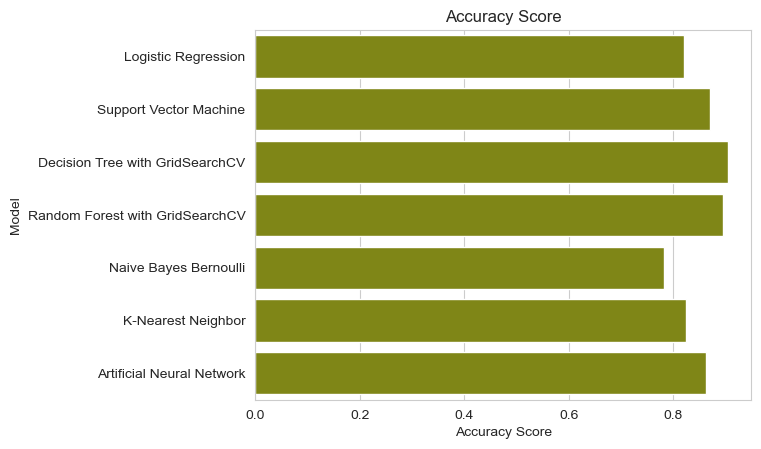

In [144]:
# Combine the lists into a pandas DataFrame
results_df = pd.DataFrame({'Accuracy Score': Accuracy_Score, 'Model': Models})

# Use the DataFrame with x and y keyword arguments
sns.barplot(x='Accuracy Score', y='Model', data=results_df, color="xkcd:baby poop green")
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()

### Analysis
The data is supervised and categorical. The predictor variables are ordinal and a few among them are nominal. The target variable 'Performance Rating' is ordinal.

To analyze the data, various data processing techniques like Label Encoding and Standardization is used.

Correlation Coeffecient is used to interpret the relationship between variables.

The most important features selected are Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager.

For training the data and predicting the target, algorithms used are Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbor and Artificial Neural Network.

A separate analysis of Department wise Performance is done as well.

### Results
Random Forest with GridSearchCV and Decision Tree with GridSearchCV gives 90% accuracy.

The features that are positively correlated are Environment Satisfaction, Last Salary Hike Percent & Worklife Balance. This means that if these factors increases, Performance Rating will increase. On the other hand, the features that are negatively correlated are Years Since Last Promotion, Experience Years at this Company, Experience years in Current Role & Years with Current Manager. This means that if these factors increases, Performance Rating will go down.

The top 3 features effecting employee performances are:
Employee Environment Satisfaction
Employee Last Salary Hike Percent
Years since last promotion

### Analysis and Insights
It is observed that the maximum accuracy is obtained when we used Random Forest with GridSearchCV and Decision tree yielded an accuracy of 90%.

### Recommendation
We can conclude that the company should provide a better environment as it increases the performance drastically. The company should increase the salary of the employee from time to time and help them maintain a worklife balance. On the other hand, shuffling the manager from time to time will also affect performance.